# Irminger Sea 11 Wind Comparison

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

# Import typing for function docstrings
import typing
from typing import Union, Tuple, List
import numpy.typing as npt

### Load the ship met data
I wrote a module of functions (the underway.py file) to parse and load the underway data. So we'll import those functions and use them to get the data into a nice dataset

In [2]:
from underway import *

In [3]:
ship_dir = "../data/underway/Irminger_Sea-11/"
ship_met_files = sorted(["/".join((ship_dir, x)) for x in os.listdir(ship_dir) if x.endswith('.csv')])
met_headers = ["/".join((ship_dir, x)) for x in os.listdir(ship_dir) if 'MET_X' in x]
par_header = "/".join((ship_dir, 'MET_PAR.txt'))
rad_header = "/".join((ship_dir, 'MET_RAD.txt'))

# Parse the underway data
irminger_underway = parse_ship_met_data(ship_met_files, ATTRS, met_headers=met_headers, par_header=par_header, rad_header=rad_header)
irminger_underway

C:\Users\areed\Documents\OOI\ooicgsn-wind-validation\scripts\underway.py:272: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(' NAN', np.nan).replace(' NODATA', np.nan)


<xarray.Dataset>
Dimensions:                            (time: 10272)
Coordinates:
  * time                               (time) datetime64[ns] 2024-06-02T00:00...
Data variables: (12/36)
    latitude                           (time) float64 41.52 41.52 ... 59.93
    longitude                          (time) float64 -70.67 -70.67 ... -39.36
    ship_speed                         (time) float64 nan nan nan ... 0.01 -0.04
    heading                            (time) float64 25.76 25.8 ... 109.1 110.0
    DPS_COG                            (time) float64 278.3 59.06 ... 103.8
    speed_over_ground                  (time) float64 0.02 0.01 ... 0.29 0.24
    ...                                 ...
    sea_surface_temperature            (time) float64 17.03 17.02 ... 6.845
    speed_of_sound                     (time) float64 1.473e+03 ... 1.478e+03
    depth12                            (time) float64 nan nan nan ... nan nan
    depth35                            (time) float64 nan nan nan ... nan nan
    em122                              (time) float64 nan nan nan ... nan nan
    EM710                              (time) float64 nan nan nan ... nan nan

In [4]:
ship_dir = "../data/underway/Pioneer-20/"
ship_met_files = sorted(["/".join((ship_dir, x)) for x in os.listdir(ship_dir) if x.endswith('.csv')])
met_headers = ["/".join((ship_dir, x)) for x in os.listdir(ship_dir) if 'MET_X' in x]
par_header = "/".join((ship_dir, 'MET_PAR.txt'))
rad_header = "/".join((ship_dir, 'MET_RAD.txt'))

# Parse the underway data
p20_underway = parse_ship_met_data(ship_met_files, ATTRS, met_headers=met_headers, par_header=par_header, rad_header=rad_header)
p20_underway

C:\Users\areed\Documents\OOI\ooicgsn-wind-validation\scripts\underway.py:272: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(' NAN', np.nan).replace(' NODATA', np.nan)


<xarray.Dataset>
Dimensions:                            (time: 17364)
Coordinates:
  * time                               (time) datetime64[ns] 2024-03-29T14:50...
Data variables: (12/36)
    latitude                           (time) float64 41.52 41.52 ... 41.49
    longitude                          (time) float64 -70.67 -70.67 ... -70.67
    ship_speed                         (time) float64 0.03 0.08 ... 2.66 5.05
    heading                            (time) float64 24.7 24.65 ... 356.9 348.4
    DPS_COG                            (time) float64 144.3 269.3 ... 23.33 7.16
    speed_over_ground                  (time) float64 0.03 0.01 ... 3.58 5.91
    ...                                 ...
    sea_surface_temperature            (time) float64 5.789 5.787 ... 6.661
    speed_of_sound                     (time) float64 1.437e+03 ... 1.434e+03
    depth12                            (time) float64 nan nan nan ... nan nan
    depth35                            (time) float64 nan nan nan ... nan nan
    em122                              (time) float64 nan nan nan ... nan nan
    EM710                              (time) float64 nan nan nan ... nan nan

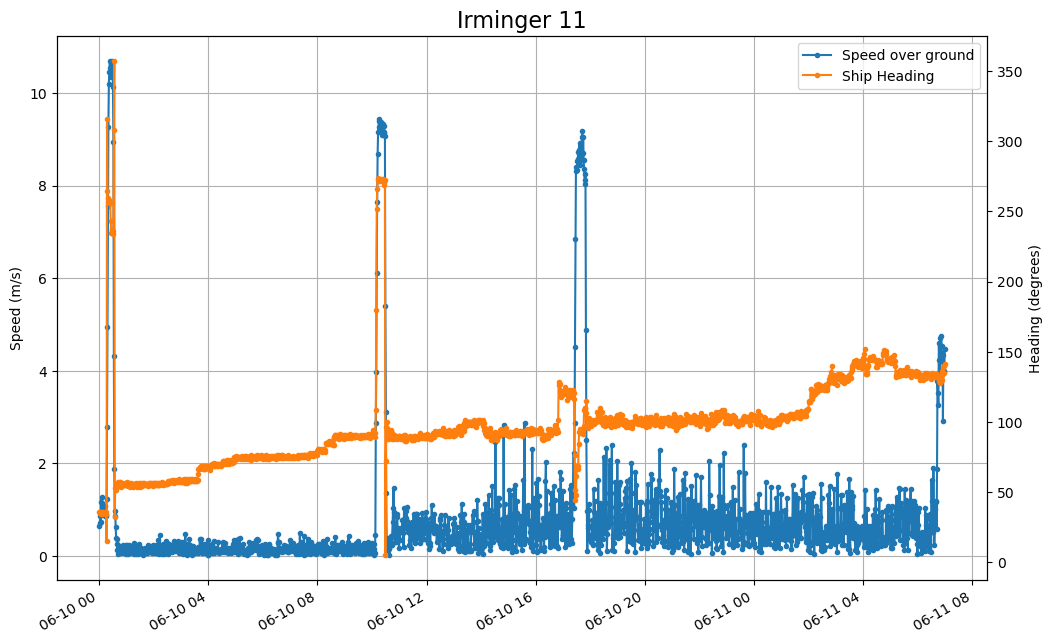

In [5]:
# Plot a timeseries of the irminger ship observations
fig, ax = plt.subplots(figsize=(12, 8))

t1 = "2024-06-10T00:00:00"
t2 = "2024-06-11T07:00:00"

l1 = ax.plot(irminger_underway.sel(time=slice(t1,t2))["time"], irminger_underway.sel(time=slice(t1,t2))["speed_over_ground"], marker=".", label="Speed over ground")
ax2 = ax.twinx()
l2 = ax2.plot(irminger_underway.sel(time=slice(t1,t2))["time"], irminger_underway.sel(time=slice(t1,t2))["heading"], marker=".", color="tab:orange", label="Ship Heading")
ax.legend()
ax.set_title('Irminger 11', fontsize=16)
ax.set_ylabel('Speed (m/s)')
ax2.set_ylabel('Heading (degrees)')

lns = l1 + l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs)

ax.grid()

fig.autofmt_xdate()

In [6]:
fig.savefig("../Irminger11_ship_speed_and_heading.png", facecolor='white', transparent=False, edgecolor='black', bbox_inches='tight')

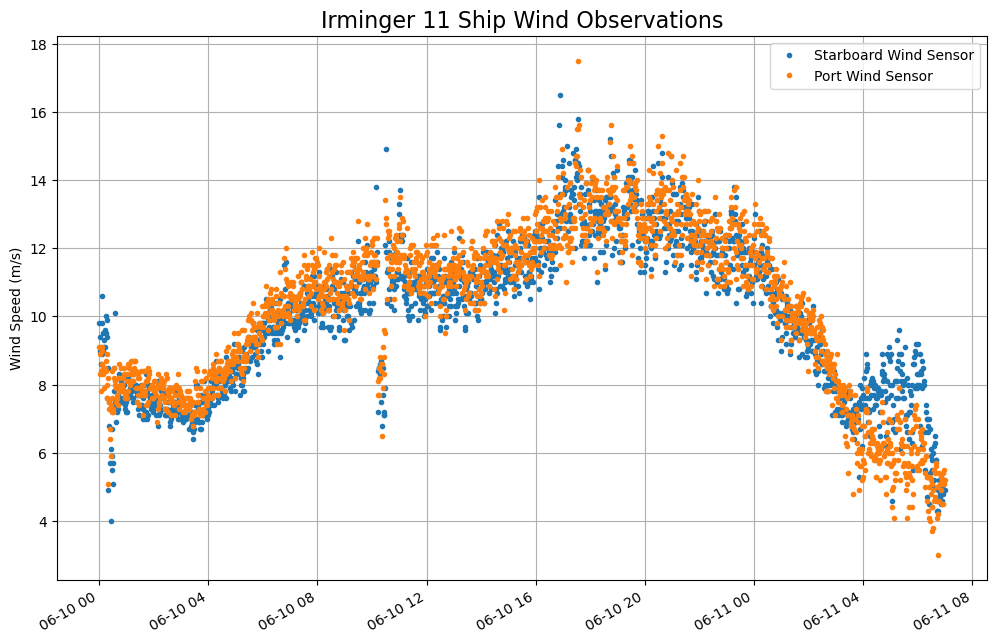

In [7]:
# Plot a timeseries of the irminger ship observations
fig, ax = plt.subplots(figsize=(12, 8))

t1 = "2024-06-10T00:00:00"
t2 = "2024-06-11T07:00:00"

ax.plot(irminger_underway.sel(time=slice(t1,t2))["time"], irminger_underway.sel(time=slice(t1,t2))["wind_speed_starboard"], marker=".", linestyle="", label="Starboard Wind Sensor")
ax.plot(irminger_underway.sel(time=slice(t1,t2))["time"], irminger_underway.sel(time=slice(t1,t2))["wind_speed_port"], marker=".", linestyle="", label="Port Wind Sensor")
ax.legend()
ax.set_title('Irminger 11 Ship Wind Observations', fontsize=16)
ax.set_ylabel('Wind Speed (m/s)')
ax.grid()

fig.autofmt_xdate()

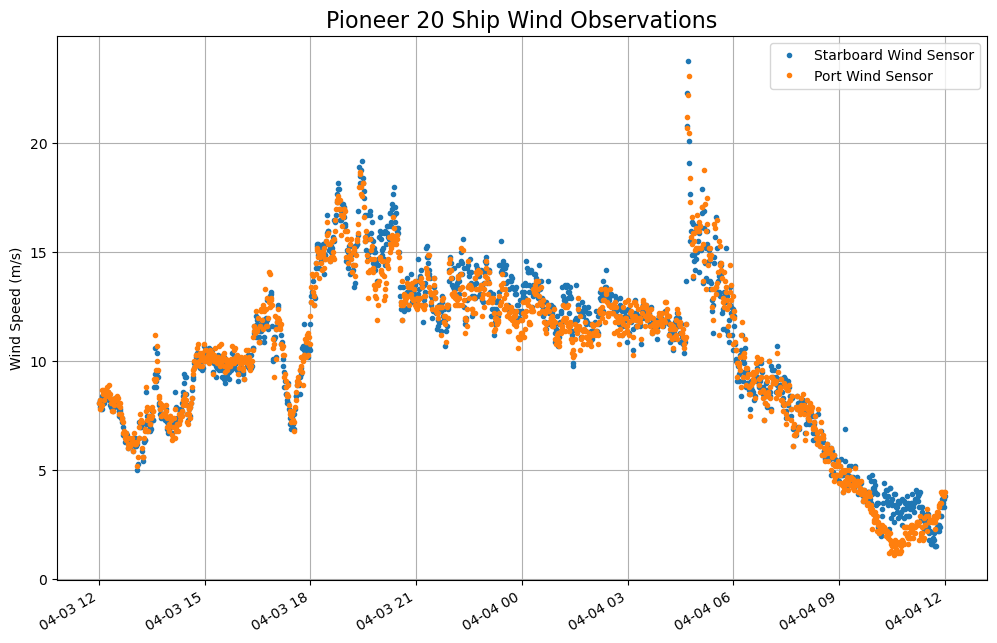

In [8]:
# Plot the Pioneer 20 underway data
fig, ax = plt.subplots(figsize=(12, 8))

t1 = "2024-04-03T12:00:00"
t2 = "2024-04-04T12:00:00"

ax.plot(p20_underway.sel(time=slice(t1,t2))["time"], p20_underway.sel(time=slice(t1,t2))["wind_speed_starboard"], marker=".", linestyle="", label="Starboard Wind Sensor")
ax.plot(p20_underway.sel(time=slice(t1,t2))["time"], p20_underway.sel(time=slice(t1,t2))["wind_speed_port"], marker=".", linestyle="", label="Port Wind Sensor")
ax.legend()
ax.set_title('Pioneer 20 Ship Wind Observations', fontsize=16)
ax.set_ylabel('Wind Speed (m/s)')
ax.grid()

fig.autofmt_xdate()

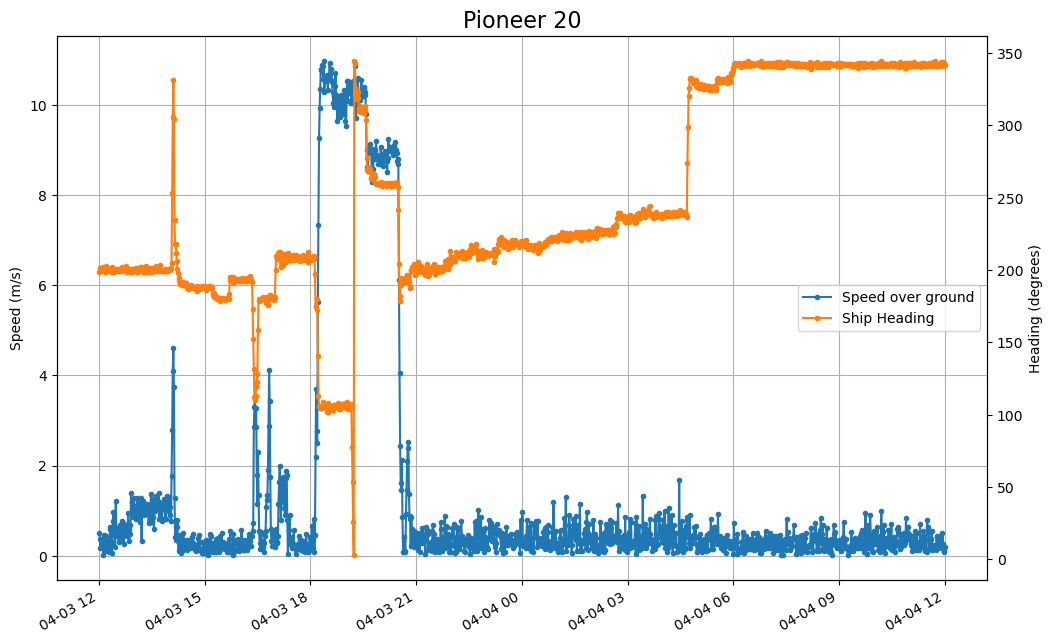

In [9]:
# Plot a timeseries of the irminger ship observations
fig, ax = plt.subplots(figsize=(12, 8))

t1 = "2024-04-03T12:00:00"
t2 = "2024-04-04T12:00:00"

l1 = ax.plot(p20_underway.sel(time=slice(t1,t2))["time"], p20_underway.sel(time=slice(t1,t2))["speed_over_ground"], marker=".", label="Speed over ground")
ax2 = ax.twinx()
l2 = ax2.plot(p20_underway.sel(time=slice(t1,t2))["time"], p20_underway.sel(time=slice(t1,t2))["heading"], marker=".", color="tab:orange", label="Ship Heading")
ax.legend()
ax.set_title('Pioneer 20', fontsize=16)
ax.set_ylabel('Speed (m/s)')
ax2.set_ylabel('Heading (degrees)')

lns = l1 + l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='center right')

ax.grid()

fig.autofmt_xdate()

In [10]:
fig.savefig("../Pioneer20_ship_speed_and_heading.png", transparent=False, facecolor='white', edgecolor="black", bbox_inches='tight')

## Irminger Buoy Data

In [11]:
from erddapy import ERDDAP

Next, we want to connect to the ERDDAP server which has the telemetered data. Since the data is not yet being ingested into the public-facing OOI Data Explorer, we're going to access the data via the OMS++ system. OMS is the internal operators dashboard which contains much of the same data. We will search for and download the data on the OMS++ erddap server.

In [12]:
oms = ERDDAP(
    server="https://cgsn-dashboard.whoi.edu/erddap/",
    protocol="tabledap",
)

Now that we're connected to the ERDDAP server, we want to search for the available datasets

In [13]:
search_url = oms.get_search_url(response="csv")
search = pd.read_csv(search_url)
datasets = search["Dataset ID"]
datasets

0                   allDatasets
1        AS03CPPM-BUOY-GPS-01-1
2       AS03CPPM-BUOY-IRID-01-1
3      AS03CPPM-BUOY-001-SUPERV
4      AS03CPPM-IMM-CTDPFK-01-1
                 ...           
518    GS01SUMO-NSIF-SPKIR-01-1
519      GS01SUMO-NSIF-CPM-01-1
520      GS01SUMO-NSIF-DCL-01-1
521      GS01SUMO-NSIF-DCL-02-1
522    GS01SUMO-NSIF-VELPT-01-1
Name: Dataset ID, Length: 523, dtype: object

Wow. That is a lot of datasets that are availabe for download/access via OMS++. We need to figure out which one is for our data. We'll look for the array "GI01SUMO" and the instrument "METBK" to be in the dataset name/id

In [14]:
for d in datasets:
    if "GI01SUMO" in d.upper() and "METBK" in d.upper():
        print(d)

GI01SUMO-BUOY-METBK-01-1
GI01SUMO-BUOY-METBK-02-1


We also want to find the FDCHP instrument (Direct Flux Covariance) which also measures wind speed using a three-axis sonic anemometer

In [15]:
for d in datasets:
    if "GI01SUMO" in d.upper() and "FDCHP" in d.upper():
        print(d)

GI01SUMO-BUOY-FDCHP-01-1


So the Irminger buoy has two datasets: METBK 1 and METBK 2. Additionally, during mooring turns, the _new_ buoy is deployed before the _old_ buoy is recovered. This means that there is a period of time when two buoys, and thus four wind sensors, were in the water. Combined with the ship observations, this makes for six datasets for comparison. So we want to query for the following Datasets:
* GI01SUMO-BUOY-METBK-01-1: Deployment 10 (D0010) & Deployment 11 (D0011)
* GI01SUMO-BUOY-METBK-02-1: Deployment 10 (D0010) & Deployment 11 (D0011)
* GI01SUMO-BUOY-FDCHP-01-1: Deployment 10 (D0010) & Deployment 11 (D0011)

If we just query the OMS++ ERDDAP server for a given dataset id (e.g. GI01SUMO-BUOY-METBK-01-1) that will provide us _all_ of the data for that dataset available from OMS++. However, we only want data for a given deployment number and for the times which overlap the ship observations. We can pass in constraints to the ERDDAP server to limit what data we get back. The constraints we want to use are:
* deploy_id=
* time>=
* time<=
where deploy_id is a given deployment (e.g. D0010) the times are the bounding start and end times for the data, passed in using the format "YYYY-mm-ddTHH:MM:SS".

First, get the time limits of the ship observations:

Next, lets get the METBK-01-1 dataset for deployment 10:

In [16]:
# Set the constraints
oms.dataset_id = "GI01SUMO-BUOY-METBK-01-1"
oms.constraints = {
    "deploy_id=": "D0010",
    "time>=": '2024-06-02T00:00:01',
    "time<=": '2024-06-12T00:00:01'
}

# Convert the data to a pandas dataframe indexed by time
irminger10_met1 = oms.to_pandas(index_col='time (UTC)', parse_dates=True)
irminger10_met1

latitude (degrees_north)  longitude (degrees_east)  \
time (UTC)                                                                      
2024-06-02 00:01:31+00:00                    59.998                   -39.481   
2024-06-02 00:02:36+00:00                    59.998                   -39.481   
2024-06-02 00:03:41+00:00                    59.998                   -39.481   
2024-06-02 00:04:17+00:00                    59.998                   -39.481   
2024-06-02 00:05:19+00:00                    59.998                   -39.481   
...                                             ...                       ...   
2024-06-11 23:54:27+00:00                    59.998                   -39.481   
2024-06-11 23:55:27+00:00                    59.998                   -39.481   
2024-06-11 23:56:31+00:00                    59.998                   -39.481   
2024-06-11 23:57:36+00:00                    59.998                   -39.481   
2024-06-11 23:58:41+00:00                    59.998                   -39.481   

                                  crs  feature_type_instance    platform  \
time (UTC)                                                                 
2024-06-02 00:01:31+00:00 -2147483647                    NaN -2147483647   
2024-06-02 00:02:36+00:00 -2147483647                    NaN -2147483647   
2024-06-02 00:03:41+00:00 -2147483647                    NaN -2147483647   
2024-06-02 00:04:17+00:00 -2147483647                    NaN -2147483647   
2024-06-02 00:05:19+00:00 -2147483647                    NaN -2147483647   
...                               ...                    ...         ...   
2024-06-11 23:54:27+00:00 -2147483647                    NaN -2147483647   
2024-06-11 23:55:27+00:00 -2147483647                    NaN -2147483647   
2024-06-11 23:56:31+00:00 -2147483647                    NaN -2147483647   
2024-06-11 23:57:36+00:00 -2147483647                    NaN -2147483647   
2024-06-11 23:58:41+00:00 -2147483647                    NaN -2147483647   

                           air_temperature (degrees_Celsius)  \
time (UTC)                                                     
2024-06-02 00:01:31+00:00                              4.526   
2024-06-02 00:02:36+00:00                              4.556   
2024-06-02 00:03:41+00:00                              4.466   
2024-06-02 00:04:17+00:00                              4.451   
2024-06-02 00:05:19+00:00                              4.526   
...                                                      ...   
2024-06-11 23:54:27+00:00                              6.662   
2024-06-11 23:55:27+00:00                              6.662   
2024-06-11 23:56:31+00:00                              6.662   
2024-06-11 23:57:36+00:00                              6.654   
2024-06-11 23:58:41+00:00                              6.662   

                           barometric_pressure (mbar)  \
time (UTC)                                              
2024-06-02 00:01:31+00:00                     1014.81   
2024-06-02 00:02:36+00:00                     1014.94   
2024-06-02 00:03:41+00:00                     1014.39   
2024-06-02 00:04:17+00:00                     1015.08   
2024-06-02 00:05:19+00:00                     1014.94   
...                                               ...   
2024-06-11 23:54:27+00:00                      999.36   
2024-06-11 23:55:27+00:00                      999.50   
2024-06-11 23:56:31+00:00                      999.50   
2024-06-11 23:57:36+00:00                      999.43   
2024-06-11 23:58:41+00:00                      999.29   

                           eastward_wind_velocity (m s-1)  \
time (UTC)                                                  
2024-06-02 00:01:31+00:00                             NaN   
2024-06-02 00:02:36+00:00                             NaN   
2024-06-02 00:03:41+00:00                           10.91   
2024-06-02 00:04:17+00:00                           10.05   
2024-06-02 00:05:19+00:00                  

Get Deployment 11 Data

In [17]:
# Set the constraints
oms.dataset_id = "GI01SUMO-BUOY-METBK-01-1"
oms.constraints = {
    "deploy_id=": "D0011",
    #"time>=": '2024-06-02T00:00:01',
    #"time<=": '2024-06-12T00:00:01'
}

# Convert the data to a pandas dataframe indexed by time
irminger11_met1 = oms.to_pandas(index_col='time (UTC)', parse_dates=True)
irminger11_met1

latitude (degrees_north)  longitude (degrees_east)  \
time (UTC)                                                                      
2024-04-09 17:57:31+00:00                    59.998                   -39.481   
2024-04-09 17:58:35+00:00                    59.998                   -39.481   
2024-04-09 17:59:40+00:00                    59.998                   -39.481   
2024-04-09 18:00:44+00:00                    59.998                   -39.481   
2024-04-09 18:01:48+00:00                    59.998                   -39.481   
...                                             ...                       ...   
2024-08-13 12:15:14+00:00                    59.998                   -39.481   
2024-08-13 12:16:19+00:00                    59.998                   -39.481   
2024-08-13 12:17:23+00:00                    59.998                   -39.481   
2024-08-13 12:18:28+00:00                    59.998                   -39.481   
2024-08-13 12:19:33+00:00                    59.998                   -39.481   

                                  crs  feature_type_instance    platform  \
time (UTC)                                                                 
2024-04-09 17:57:31+00:00 -2147483647                    NaN -2147483647   
2024-04-09 17:58:35+00:00 -2147483647                    NaN -2147483647   
2024-04-09 17:59:40+00:00 -2147483647                    NaN -2147483647   
2024-04-09 18:00:44+00:00 -2147483647                    NaN -2147483647   
2024-04-09 18:01:48+00:00 -2147483647                    NaN -2147483647   
...                               ...                    ...         ...   
2024-08-13 12:15:14+00:00 -2147483647                    NaN -2147483647   
2024-08-13 12:16:19+00:00 -2147483647                    NaN -2147483647   
2024-08-13 12:17:23+00:00 -2147483647                    NaN -2147483647   
2024-08-13 12:18:28+00:00 -2147483647                    NaN -2147483647   
2024-08-13 12:19:33+00:00 -2147483647                    NaN -2147483647   

                           air_temperature (degrees_Celsius)  \
time (UTC)                                                     
2024-04-09 17:57:31+00:00                            -20.000   
2024-04-09 17:58:35+00:00                            -20.000   
2024-04-09 17:59:40+00:00                            -20.000   
2024-04-09 18:00:44+00:00                            -20.000   
2024-04-09 18:01:48+00:00                            -20.000   
...                                                      ...   
2024-08-13 12:15:14+00:00                              8.760   
2024-08-13 12:16:19+00:00                              8.775   
2024-08-13 12:17:23+00:00                              8.805   
2024-08-13 12:18:28+00:00                              8.828   
2024-08-13 12:19:33+00:00                              8.805   

                           barometric_pressure (mbar)  \
time (UTC)                                              
2024-04-09 17:57:31+00:00                     1014.94   
2024-04-09 17:58:35+00:00                     1014.94   
2024-04-09 17:59:40+00:00                     1015.01   
2024-04-09 18:00:44+00:00                     1015.01   
2024-04-09 18:01:48+00:00                     1015.01   
...                                               ...   
2024-08-13 12:15:14+00:00                      991.43   
2024-08-13 12:16:19+00:00                      991.29   
2024-08-13 12:17:23+00:00                      991.23   
2024-08-13 12:18:28+00:00                      991.50   
2024-08-13 12:19:33+00:00                      991.43   

                           eastward_wind_velocity (m s-1)  \
time (UTC)                                                  
2024-04-09 17:57:31+00:00                            0.02   
2024-04-09 17:58:35+00:00                            0.00   
2024-04-09 17:59:40+00:00                            0.03   
2024-04-09 18:00:44+00:00                            0.02   
2024-04-09 18:01:48+00:00                  

In [18]:
# Set the constraints
oms.dataset_id = "GI01SUMO-BUOY-METBK-02-1"
oms.constraints = {
    "deploy_id=": "D0011",
    #"time>=": '2024-06-02T00:00:01',
    #"time<=": '2024-06-12T00:00:01'
}

# Convert the data to a pandas dataframe indexed by time
irminger11_met2 = oms.to_pandas(index_col='time (UTC)', parse_dates=True)
irminger11_met2

latitude (degrees_north)  longitude (degrees_east)  \
time (UTC)                                                                      
2024-04-09 17:57:56+00:00                    59.998                   -39.481   
2024-04-09 18:21:13+00:00                    59.998                   -39.481   
2024-04-09 18:22:18+00:00                    59.998                   -39.481   
2024-04-09 18:23:22+00:00                    59.998                   -39.481   
2024-04-09 18:24:27+00:00                    59.998                   -39.481   
...                                             ...                       ...   
2024-08-13 12:16:38+00:00                    59.998                   -39.481   
2024-08-13 12:17:42+00:00                    59.998                   -39.481   
2024-08-13 12:18:47+00:00                    59.998                   -39.481   
2024-08-13 12:19:52+00:00                    59.998                   -39.481   
2024-08-13 12:20:58+00:00                    59.998                   -39.481   

                                  crs  feature_type_instance    platform  \
time (UTC)                                                                 
2024-04-09 17:57:56+00:00 -2147483647                    NaN -2147483647   
2024-04-09 18:21:13+00:00 -2147483647                    NaN -2147483647   
2024-04-09 18:22:18+00:00 -2147483647                    NaN -2147483647   
2024-04-09 18:23:22+00:00 -2147483647                    NaN -2147483647   
2024-04-09 18:24:27+00:00 -2147483647                    NaN -2147483647   
...                               ...                    ...         ...   
2024-08-13 12:16:38+00:00 -2147483647                    NaN -2147483647   
2024-08-13 12:17:42+00:00 -2147483647                    NaN -2147483647   
2024-08-13 12:18:47+00:00 -2147483647                    NaN -2147483647   
2024-08-13 12:19:52+00:00 -2147483647                    NaN -2147483647   
2024-08-13 12:20:58+00:00 -2147483647                    NaN -2147483647   

                           air_temperature (degrees_Celsius)  \
time (UTC)                                                     
2024-04-09 17:57:56+00:00                            -20.000   
2024-04-09 18:21:13+00:00                             60.440   
2024-04-09 18:22:18+00:00                             60.470   
2024-04-09 18:23:22+00:00                             60.485   
2024-04-09 18:24:27+00:00                             60.493   
...                                                      ...   
2024-08-13 12:16:38+00:00                              8.833   
2024-08-13 12:17:42+00:00                              8.878   
2024-08-13 12:18:47+00:00                              8.848   
2024-08-13 12:19:52+00:00                              8.886   
2024-08-13 12:20:58+00:00                              8.878   

                           barometric_pressure (mbar)  \
time (UTC)                                              
2024-04-09 17:57:56+00:00                      900.00   
2024-04-09 18:21:13+00:00                     1015.29   
2024-04-09 18:22:18+00:00                     1015.29   
2024-04-09 18:23:22+00:00                     1015.29   
2024-04-09 18:24:27+00:00                     1015.29   
...                                               ...   
2024-08-13 12:16:38+00:00                      991.29   
2024-08-13 12:17:42+00:00                      991.29   
2024-08-13 12:18:47+00:00                      991.29   
2024-08-13 12:19:52+00:00                      991.29   
2024-08-13 12:20:58+00:00                      991.09   

                           eastward_wind_velocity (m s-1)  \
time (UTC)                                                  
2024-04-09 17:57:56+00:00                            0.00   
2024-04-09 18:21:13+00:00                            0.00   
2024-04-09 18:22:18+00:00                           -0.03   
2024-04-09 18:23:22+00:00                            0.03   
2024-04-09 18:24:27+00:00                  

In [19]:
# Now lets get the rest of the datasets
# Set the constraints
oms.dataset_id = "GI01SUMO-BUOY-FDCHP-01-1"
oms.constraints = {
    "deploy_id=": "D0011",
    #"time>=": '2024-06-02T00:00:01',
    #"time<=": '2024-06-12T00:00:01'
}

# Convert the data to a pandas dataframe indexed by time
irminger11_fdchp = oms.to_pandas(index_col='time (UTC)', parse_dates=True)
irminger11_fdchp

feature_type_instance  latitude (degrees_north)  \
time (UTC)                                                                  
2024-04-23 15:21:59+00:00              gi01sumo                    59.998   
2024-04-23 16:22:00+00:00              gi01sumo                    59.998   
2024-04-23 20:22:00+00:00              gi01sumo                    59.998   
2024-04-23 21:22:00+00:00              gi01sumo                    59.998   
2024-04-23 22:22:00+00:00              gi01sumo                    59.998   
...                                         ...                       ...   
2024-08-13 07:21:52+00:00              gi01sumo                    59.998   
2024-08-13 08:21:52+00:00              gi01sumo                    59.998   
2024-08-13 09:21:52+00:00              gi01sumo                    59.998   
2024-08-13 10:21:52+00:00              gi01sumo                    59.998   
2024-08-13 11:21:52+00:00              gi01sumo                    59.998   

                           longitude (degrees_east)         crs    platform  \
time (UTC)                                                                    
2024-04-23 15:21:59+00:00                   -39.481 -2147483647 -2147483647   
2024-04-23 16:22:00+00:00                   -39.481 -2147483647 -2147483647   
2024-04-23 20:22:00+00:00                   -39.481 -2147483647 -2147483647   
2024-04-23 21:22:00+00:00                   -39.481 -2147483647 -2147483647   
2024-04-23 22:22:00+00:00                   -39.481 -2147483647 -2147483647   
...                                             ...         ...         ...   
2024-08-13 07:21:52+00:00                   -39.481 -2147483647 -2147483647   
2024-08-13 08:21:52+00:00                   -39.481 -2147483647 -2147483647   
2024-08-13 09:21:52+00:00                   -39.481 -2147483647 -2147483647   
2024-08-13 10:21:52+00:00                   -39.481 -2147483647 -2147483647   
2024-08-13 11:21:52+00:00                   -39.481 -2147483647 -2147483647   

                           depth (m)  acceleration_x  acceleration_y  \
time (UTC)                                                             
2024-04-23 15:21:59+00:00      -4.81            0.01            0.01   
2024-04-23 16:22:00+00:00      -4.81            0.01            0.01   
2024-04-23 20:22:00+00:00      -4.81            0.01            0.01   
2024-04-23 21:22:00+00:00      -4.81            0.01            0.01   
2024-04-23 22:22:00+00:00      -4.81            0.01            0.01   
...                              ...             ...             ...   
2024-08-13 07:21:52+00:00      -4.81            0.03           -0.04   
2024-08-13 08:21:52+00:00      -4.81            0.03           -0.04   
2024-08-13 09:21:52+00:00      -4.81            0.03           -0.04   
2024-08-13 10:21:52+00:00      -4.81            0.03           -0.04   
2024-08-13 11:21:52+00:00      -4.81            0.03           -0.04   

                           acceleration_z  avg_wind_u  ...  std_w_corrected  \
time (UTC)                                             ...                    
2024-04-23 15:21:59+00:00            1.00        0.07  ...             0.00   
2024-04-23 16:22:00+00:00            1.00        0.17  ...             0.00   
2024-04-23 20:22:00+00:00            1.00        0.21  ...             0.00   
2024-04-23 21:22:00+00:00            1.00        0.14  ...             0.00   
2024-04-23 22:22:00+00:00            1.00        0.21  ...             0.00   
...                                   ...         ...  ...              ...   
2024-08-13 07:21:52+00:00            0.99       -2.12  ...             0.10   
2024-08-13 08:21:52+00:00            0.99       -1.64  ...             0.09   
2024-08-13 09:21:52+00:00            0.99       -2.43  ...             0.09   
2024-08-13 10:21:52+00:00            0.99       -2.38  ...             0.11   
2024-08-13 11:21:52+00:00            0.99       -1.86  ...             0.10   

                           std_

---
### Adjust the data
One complicating factor in making an comparisons between the ship and buoy wind data is that the ship data is measured from the ship mast which, on the Armstrong, is at 17.9 m height. In comparison, the buoy MET wind sensors are mounted on the mast of the buoy. The buoy deck sits 45 cm above the water line, while the wind sensors and FDCHP are mounted 540 cm above the buoy deck. So we need to correct for the height differences between the sensors on the Armstrong and the buoys. We do this by defining a function based on the COARE (Coupled Ocean-Atmosphere Response Experiment) 3.5 flux algorithms.

In [20]:
# We first need to calculate the 10-meter wind speeds U10 and the friction-velocity u* (ustar)
def dragNC35(z: Union[int, float], U: npt.NDArray[float]) -> Tuple[npt.NDArray[float], npt.NDArray[float]]:
    """
    Calculate 10 meter winds and u* winds using COARE 3.5 algorithm
    
    Parameters
    ----------
    z: float
        The height of the wind sensor in meters
    U: float
        The measured wind speed by the wind sensor

    Returns
    -------
    U10: float
        The 10 meter winds
    Ustar: float
        The friction velocity
    """

    # Define constants
    wstr = 0.2/1.2
    ug = 0.2
    von = 0.4
    visc = 1.45E-5
    umax = 19
    a1 = 0.0017
    a2 = -0.005
    charnold = 0.011
    rnn = 1/9

    # Run the COARE 3.5 algorithm
    # Initialize values
    ut = np.sqrt(U*U + ug*ug)
    us = 0.035*ut
    charn=a1*ut + a2
    mask = (charn > umax)
    charn[mask] = a1*umax+a2
    # Iterate 10 times, updating with each successive pass
    i=0
    while i<10:
        z0 = visc/us*rnn + charn*us*us/9.8
        us = ut*von/np.log(z/z0)
        u10 = ut + us/von*np.log(10/z)
        # Update the charn variable
        mask = (u10 > umax)
        charn[mask] = a1*umax + a2
        charn[~mask] = a1*u10[~mask] + a2
        # Calculate ustar
        ustar = us
        # Calculate 10m winds
        U10 = ut + us/von*np.log(10/z)
        # Update counter
        i = i + 1

    return U10, ustar

# Next, we write a function which uses the u* values to adjust the heights
def adjust_height(wspd: npt.NDArray[float], ustar: npt.NDArray[float], z: Union[int, float], z0: Union[int, float]) -> npt.NDArray[float]:
    """
    Adjust the height of a wind sensor from height z to height z0
    
    Parameters
    ----------
    wspd: numpy.array[float]
        An array of observed wind speeds at height z
    ustar: numpy.array[float]
        An array of ustar values for the associated wspd at height
        z
    z: int | float
        Height at which the winds were observed in meters
    z0: int | float
        Height to adjust the observed wind speeds to in meters

    Returns
    -------
    adjusted: numpy.array[float]
        An array of the observed wind speeds adjusted from height z to height z0
    """

    correction = (ustar/0.4)*np.log(z0/z)
    adjusted = wspd + correction

    return adjusted

In [21]:
# Calculate the U10 and ustar 
U10, ustar = dragNC35(17.9, irminger_underway["wind_speed_starboard"].values)

# Add the ustar to the underway data
irminger_underway["friction_velocity_starboard"] = (["time"], ustar)
irminger_underway["friction_velocity_starboard"].attrs = {
    'standard_name': 'friction_velocity',
    'long_name': 'Friction Velocity - Starboard',
    'units': 'm s-1',
    'comment': ('Friction velocity is a reference wind velocity that relates the Reynold\'s stress with the density. It is '
                'applied to motion near the ground where the shearing stress is assumed to be independent of height and '
                'proportional to the square of the mean velocity.')
}

# Calculate the adjusted wind speed
wspd = irminger_underway["wind_speed_starboard"]
ustar = irminger_underway["friction_velocity_starboard"]
irminger_underway["adj_wind_speed_starboard"] = adjust_height(wspd, ustar, 17.9, 5.85)
irminger_underway["adj_wind_speed_starboard"]


# Repeat for the port sensor
U10, ustar = dragNC35(17.9, irminger_underway["wind_speed_port"].values)

irminger_underway["friction_velocity_port"] = (["time"], ustar)
irminger_underway["friction_velocity_port"].attrs = {
    'standard_name': 'friction_velocity',
    'long_name': 'Friction Velocity - Port',
    'units': 'm s-1',
    'comment': ('Friction velocity is a reference wind velocity that relates the Reynold\'s stress with the density. It is '
                'applied to motion near the ground where the shearing stress is assumed to be independent of height and '
                'proportional to the square of the mean velocity.')
}

# Calculate the adjusted wind speed
wspd = irminger_underway["wind_speed_port"]
ustar = irminger_underway["friction_velocity_port"]
irminger_underway["adj_wind_speed_port"] = adjust_height(wspd, ustar, 17.9, 5.85)
irminger_underway["adj_wind_speed_port"]

<xarray.DataArray 'adj_wind_speed_port' (time: 10272)>
array([2.20196642, 2.5714212 , 2.47905569, ..., 1.92495065, 1.83264063,
       1.74034868])
Coordinates:
  * time     (time) datetime64[ns] 2024-06-02T00:00:54.506000 ... 2024-06-11T...

Now we have data that are directly comparable to each other. I would recommend saving your different datasets as new datasets locally so you don't have to go through the different data access steps. Now we are ready to begin analysis!

---
## Irminger Comparisons

In [22]:
def resample_interpolate(df, freq='1min'):
    """Resample and interpolate a datetime index dataframe to new frequency"""
    new_index = df.resample(freq).asfreq().index
    tmp_index = df.index.union(new_index)
    new_df = df.reindex(tmp_index).interpolate('index').reindex(new_index)
    return new_df

In [23]:
# First, need to calculate the wind speed and wind direction from the northward and eastward wind directions

In [24]:
def wind_speed_and_direction(u: Union[int, float, npt.NDArray[float]], v: Union[int, float]) -> Union[int, float]:
    """Calculate the wind speed and direction from the vector wind components"""
    wspd = np.sqrt(u**2 + v**2)
    wdir = np.mod(180/np.pi*np.arctan2(u, v), 360)
    return wspd, wdir

In [25]:
wspd, wdir = wind_speed_and_direction(irminger10_met1['eastward_wind_velocity (m s-1)'], irminger10_met1['northward_wind_velocity (m s-1)'])
irminger10_met1['wind_speed'] = wspd
irminger10_met1['wind_direction'] = wdir

In [26]:
wspd, wdir = wind_speed_and_direction(irminger11_met1['eastward_wind_velocity (m s-1)'], irminger11_met1['northward_wind_velocity (m s-1)'])
irminger11_met1['wind_speed'] = wspd
irminger11_met1['wind_direction'] = wdir

In [27]:
wspd, wdir = wind_speed_and_direction(irminger11_met2['eastward_wind_velocity (m s-1)'], irminger11_met2['northward_wind_velocity (m s-1)'])
irminger11_met2['wind_speed'] = wspd
irminger11_met2['wind_direction'] = wdir

Resample and average to 1-hour intervals

In [28]:
# Drop non-numeric columns
irminger11_met1 = irminger11_met1.drop(columns=['deploy_id (1)'])
irminger11_met2 = irminger11_met2.drop(columns=['deploy_id (1)'])
irminger10_met1 = irminger10_met1.drop(columns=['deploy_id (1)'])
irminger11_fdchp = irminger11_fdchp.drop(columns=['deploy_id (1)', 'dcl_date_time_string (1)', 'feature_type_instance'])

In [29]:
# Calculate the 1 hr averages
irminger11_met1_1hr_avg = irminger11_met1.resample('1H').mean()
irminger11_met2_1hr_avg = irminger11_met2.resample('1H').mean()
irminger10_met1_1hr_avg = irminger10_met1.resample('1H').mean()
irminger11_fdchp_1hr_avg = irminger11_fdchp.resample('1H').mean()
irminger11_fdchp_1hr_avg = irminger11_fdchp_1hr_avg.dropna(subset=['wind_speed'])

# Calculate the associated standard deviations
irminger11_met1_1hr_std = irminger11_met1.resample('1H').std()
irminger11_met2_1hr_std = irminger11_met2.resample('1H').std()
irminger10_met1_1hr_std = irminger10_met1.resample('1H').std()
irminger11_fdchp_1hr_std = irminger11_fdchp.resample('1H').std()
irminger11_fdchp_1hr_std = irminger11_fdchp_1hr_std.dropna(subset=['wind_speed'])

C:\Users\areed\AppData\Local\Temp\ipykernel_2624\3745589115.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  irminger11_met1_1hr_avg = irminger11_met1.resample('1H').mean()
C:\Users\areed\AppData\Local\Temp\ipykernel_2624\3745589115.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  irminger11_met2_1hr_avg = irminger11_met2.resample('1H').mean()
C:\Users\areed\AppData\Local\Temp\ipykernel_2624\3745589115.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  irminger10_met1_1hr_avg = irminger10_met1.resample('1H').mean()
C:\Users\areed\AppData\Local\Temp\ipykernel_2624\3745589115.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  irminger11_fdchp_1hr_avg = irminger11_fdchp.resample('1H').mean()
C:\Users\areed\AppData\Local\Temp\ipykernel_2624\3745589115.py:9: FutureWarnin

In [30]:
# Calculate the underway 1 hr averages and standard deviations
irminger_underway_1hr_avg = irminger_underway.resample(time='1H').mean()
irminger_underway_1hr_avg["time"] = pd.to_datetime(irminger_underway_1hr_avg.time)
irminger_underway_1hr_std = irminger_underway.resample(time='1H').std()
irminger_underway_1hr_std["time"] =pd.to_datetime(irminger_underway_1hr_std.time)


C:\Users\areed\AppData\Local\miniconda3\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_grouper = pd.Grouper(
C:\Users\areed\AppData\Local\miniconda3\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_grouper = pd.Grouper(


### Ship Comparisons

MET Comparison: June 10th at midnight through June 11 at 7:00 am, with excursions from 10 am to 2:00 pm for CTD casts, which is still decent data for comparisons

In [31]:
t1 = "2024-06-10T00:00:00"
t2 = "2024-06-11T03:00:00"

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 [Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8'),
  Text(0, 9.0, '9'),
  Text(0, 10.0, '10'),
  Text(0, 11.0, '11'),
  Text(0, 12.0, '12'),
  Text(0, 13.0, '13')])

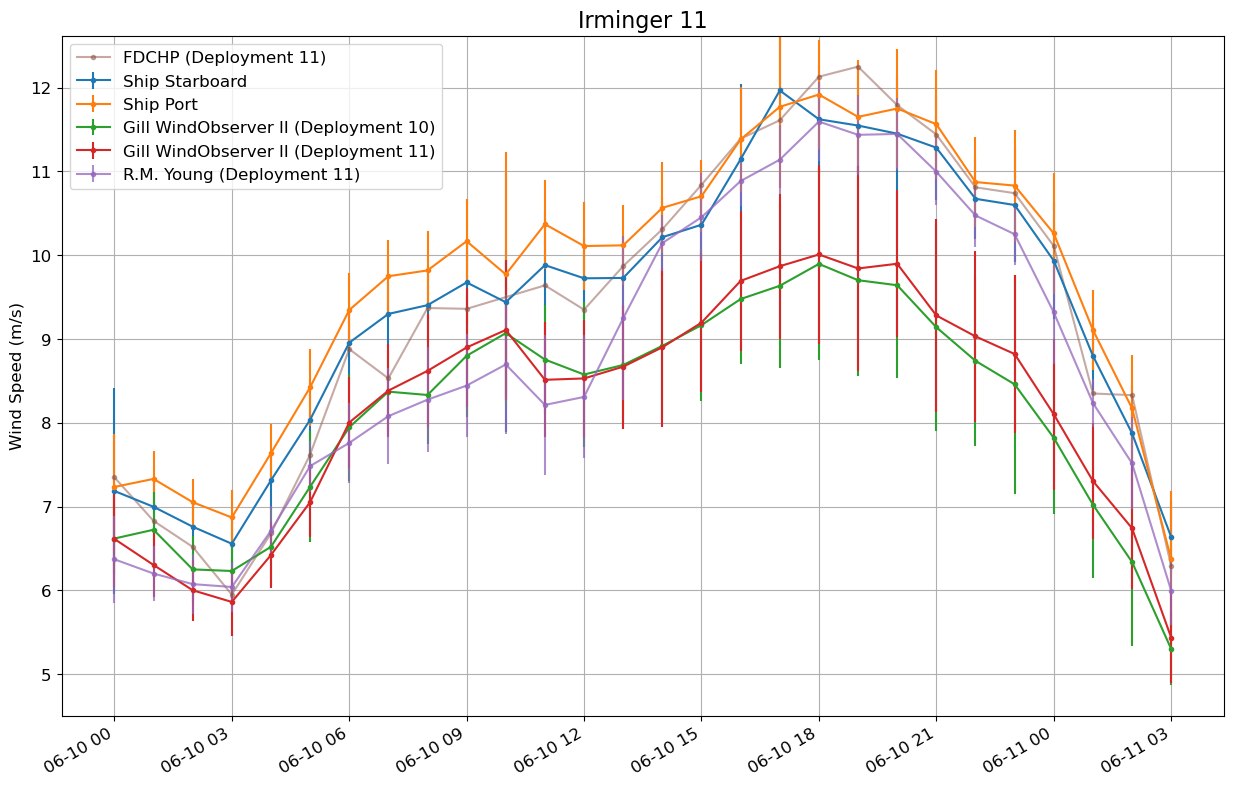

In [32]:
# Plot the full time comparison
fig, ax = plt.subplots(figsize=(15, 10))

ax.errorbar(irminger_underway_1hr_avg.sel(time=slice(t1,t2))["time"].values, irminger_underway_1hr_avg.sel(time=slice(t1,t2))["adj_wind_speed_starboard"], irminger_underway_1hr_std.sel(time=slice(t1,t2))["adj_wind_speed_starboard"],
            marker=".", label="Ship Starboard")
ax.errorbar(irminger_underway_1hr_avg.sel(time=slice(t1,t2))["time"].values, irminger_underway_1hr_avg.sel(time=slice(t1,t2))["adj_wind_speed_port"], irminger_underway_1hr_std.sel(time=slice(t1,t2))["adj_wind_speed_port"],
        marker=".", label="Ship Port")
ax.errorbar(irminger10_met1_1hr_avg.loc[slice(t1,t2)].index, irminger10_met1_1hr_avg.loc[slice(t1,t2)]['wind_speed'], irminger10_met1_1hr_std.loc[slice(t1,t2)]['wind_speed'],
            marker=".", label='Gill WindObserver II (Deployment 10)')
ax.errorbar(irminger11_met1_1hr_avg.loc[slice(t1,t2)].index, irminger11_met1_1hr_avg.loc[slice(t1,t2)]['wind_speed'], irminger11_met1_1hr_std.loc[slice(t1,t2)]['wind_speed'],
            marker=".", label='Gill WindObserver II (Deployment 11)')
ax.errorbar(irminger11_met2_1hr_avg.loc[slice(t1,t2)].index, irminger11_met2_1hr_avg.loc[slice(t1,t2)]['wind_speed'],  irminger11_met2_1hr_std.loc[slice(t1,t2)]['wind_speed'], 
        marker=".", alpha=0.75, label='R.M. Young (Deployment 11)')
ax.plot(irminger11_fdchp_1hr_avg.loc[slice(t1,t2)].index, irminger11_fdchp_1hr_avg.loc[slice(t1,t2)]['wind_speed'], marker=".", alpha=0.5, label='FDCHP (Deployment 11)')
ax.set_ylabel('Wind Speed (m/s)', fontsize=12)
ax.set_title('Irminger 11', fontsize=16)
ax.grid()
ax.legend(fontsize=12)

fig.autofmt_xdate()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [33]:
fig.savefig("../Irminger11_wind_comparison_with_ship_timeseries.png", transparent=False, facecolor='white', edgecolor="black", bbox_inches='tight')

Plot all of the METBK and FDCHP data for Irminger 11 that is available

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, -2.5, '−2.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0')])

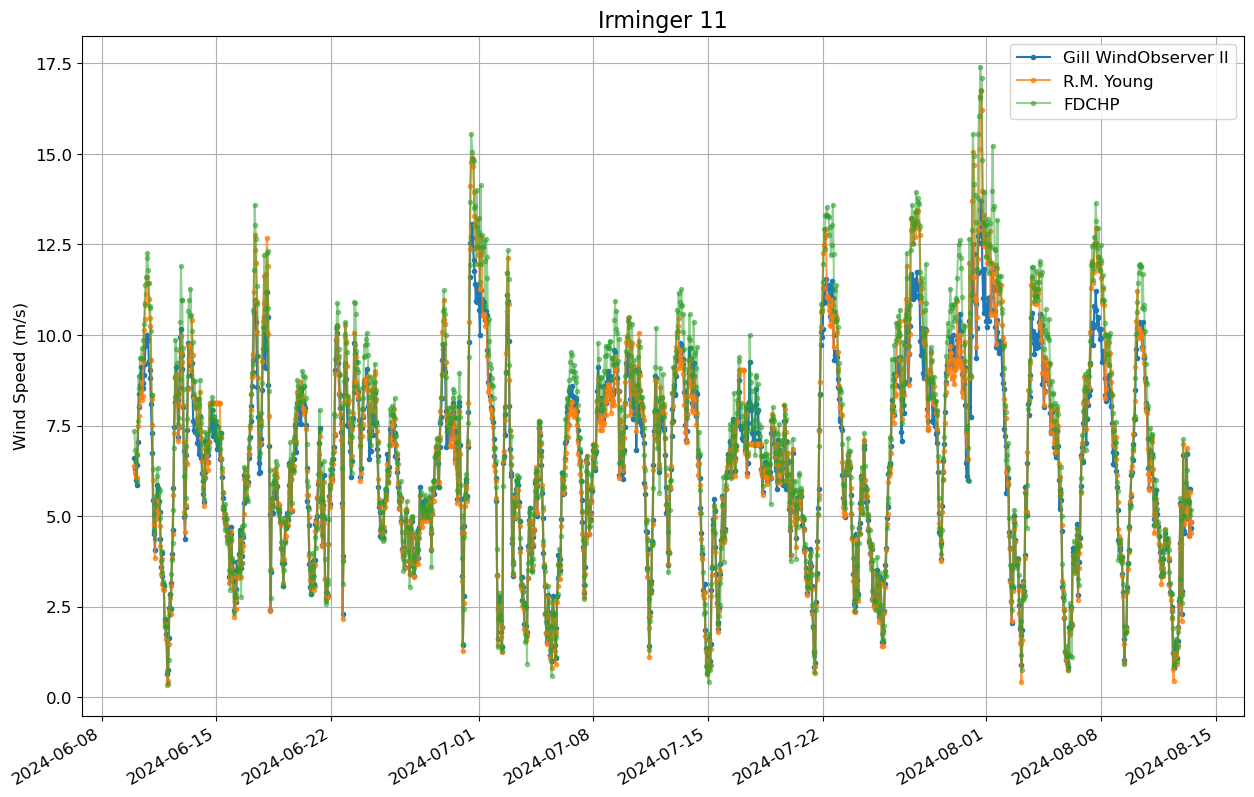

In [34]:
# Plot the full time comparison
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(irminger11_met1_1hr_avg.loc[t1:].index, irminger11_met1_1hr_avg.loc[t1:]['wind_speed'], marker=".", label='Gill WindObserver II')
ax.plot(irminger11_met2_1hr_avg.loc[t1:].index, irminger11_met2_1hr_avg.loc[t1:]['wind_speed'], marker=".", alpha=0.75, label='R.M. Young')
ax.plot(irminger11_fdchp_1hr_avg.loc[t1:].index, irminger11_fdchp_1hr_avg.loc[t1:]['wind_speed'], marker=".", alpha=0.5, label='FDCHP')
ax.set_ylabel('Wind Speed (m/s)', fontsize=12)
ax.set_title('Irminger 11', fontsize=16)
ax.grid()
ax.legend(fontsize=12)

fig.autofmt_xdate()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [35]:
fig.savefig("../Irminger11_wind_comparison_timeseries.png", transparent=False, facecolor='white', edgecolor="black", bbox_inches='tight')

**Comparison of Met sensors with the Ship Sensors**

First, have to interpolate the data to matching one-minute resolution

In [36]:
# Subselect only the relevant time period

# Start with the Irminger 10 data
irminger10_met1_1min = irminger10_met1.loc[slice(t1,t2)]
irminger10_met1_1min = resample_interpolate(irminger10_met1_1min)

# Irminger 11 data
irminger11_met1_1min = irminger11_met1.loc[slice(t1,t2)]
irminger11_met1_1min = resample_interpolate(irminger11_met1_1min)

irminger11_met2_1min = irminger11_met2.loc[slice(t1,t2)]
irminger11_met2_1min = resample_interpolate(irminger11_met2_1min)

# Underway data
irminger_underway_1min = irminger_underway.sel(time=slice(t1, t2))
irminger_underway_1min = irminger_underway_1min[['adj_wind_speed_port','adj_wind_speed_starboard']].to_dataframe()
irminger_underway_1min = resample_interpolate(irminger_underway_1min)
irminger_underway_1min.index = irminger_underway_1min.index.tz_localize('UTC')

# Find intersection of indicies
irminger10_met1_index = [x for x in irminger10_met1_1min.index if x in irminger_underway_1min.index]
irminger11_met1_index = [x for x in irminger11_met1_1min.index if x in irminger_underway_1min.index]
irminger11_met2_index = [x for x in irminger11_met2_1min.index if x in irminger_underway_1min.index]

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]), [])

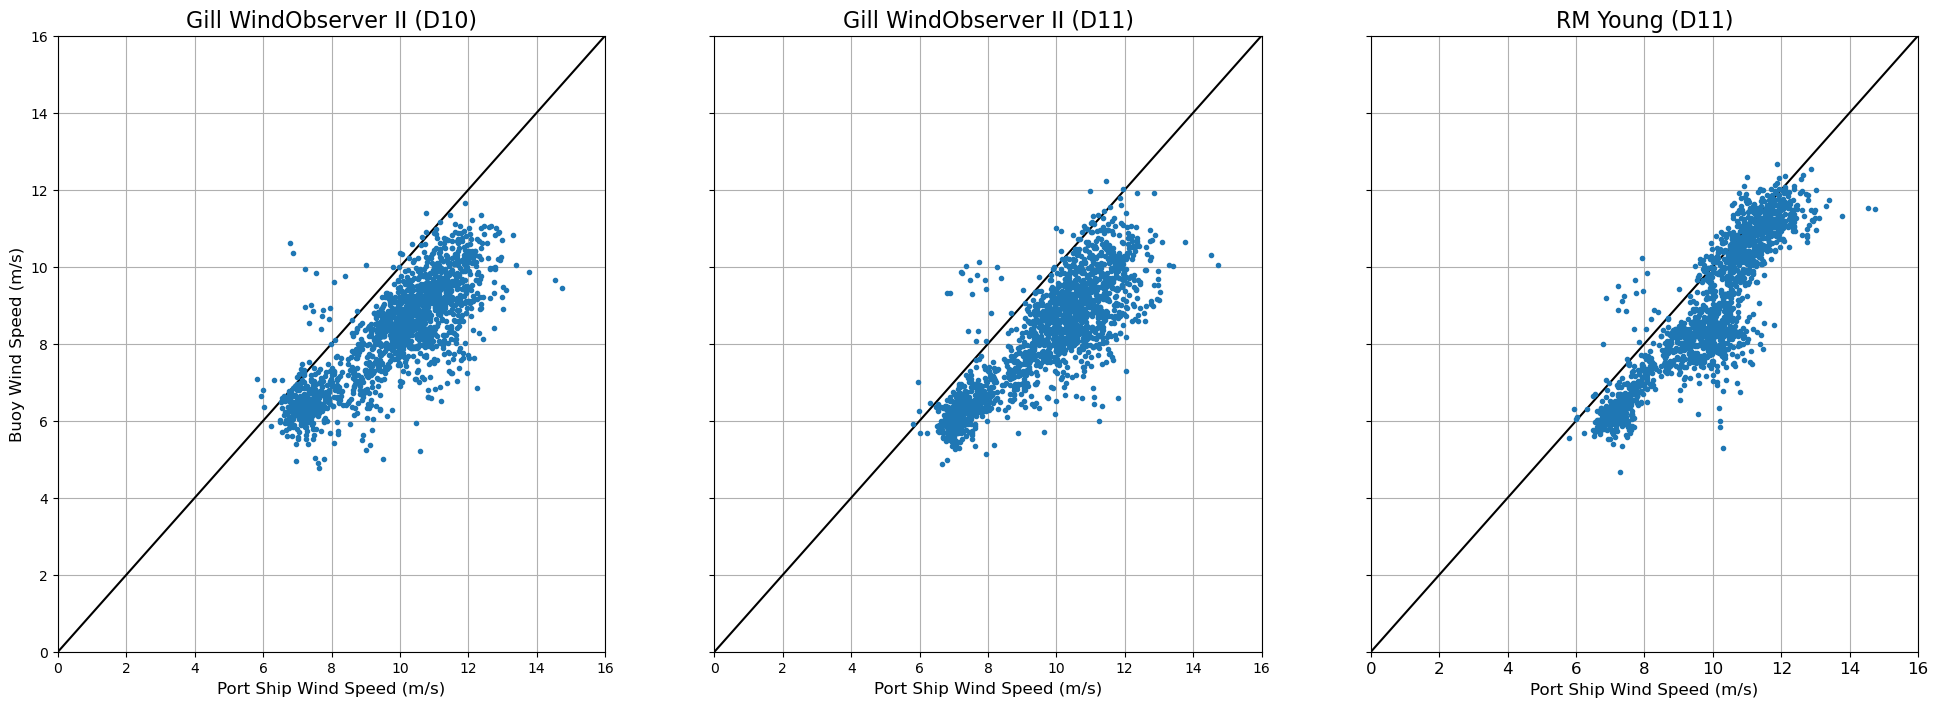

In [37]:
# Plot the comparisons!
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24, 8), sharey=True)

ax1.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax1.plot(irminger_underway_1min.loc[irminger10_met1_index]['adj_wind_speed_port'], irminger10_met1_1min.loc[irminger10_met1_index]['wind_speed'], marker=".", linestyle="", label='Gill WindObserver II')
ax1.set_ylabel('Buoy Wind Speed (m/s)', fontsize=12)
ax1.set_ylim((0, 16))
ax1.set_xlim((0, 16))
ax1.set_xlabel('Port Ship Wind Speed (m/s)', fontsize=12)
ax1.set_title('Gill WindObserver II (D10)', fontsize=16)
ax1.grid()

ax2.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax2.plot(irminger_underway_1min.loc[irminger11_met1_index]['adj_wind_speed_port'], irminger11_met1_1min.loc[irminger11_met1_index]['wind_speed'], marker=".", linestyle="", label='Gill WindObserver II')
ax2.set_xlabel('Port Ship Wind Speed (m/s)', fontsize=12)
ax2.set_title('Gill WindObserver II (D11)', fontsize=16)
ax2.set_ylim((0, 16))
ax2.set_xlim((0, 16))
ax2.grid()

ax3.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax3.plot(irminger_underway_1min.loc[irminger11_met2_index]['adj_wind_speed_port'], irminger11_met2_1min.loc[irminger11_met2_index]['wind_speed'], marker=".", linestyle="", label='Gill WindObserver II')
ax3.set_xlabel('Port Ship Wind Speed (m/s)', fontsize=12)
ax3.set_title('RM Young (D11)', fontsize=16)
ax3.set_ylim((0, 16))
ax3.set_xlim((0, 16))
ax3.grid()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [38]:
fig.savefig('../Comparison_buoy_sensors_vs_ship_port_wind.png', transparent=False, facecolor='white', edgecolor="black", bbox_inches='tight')

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]), [])

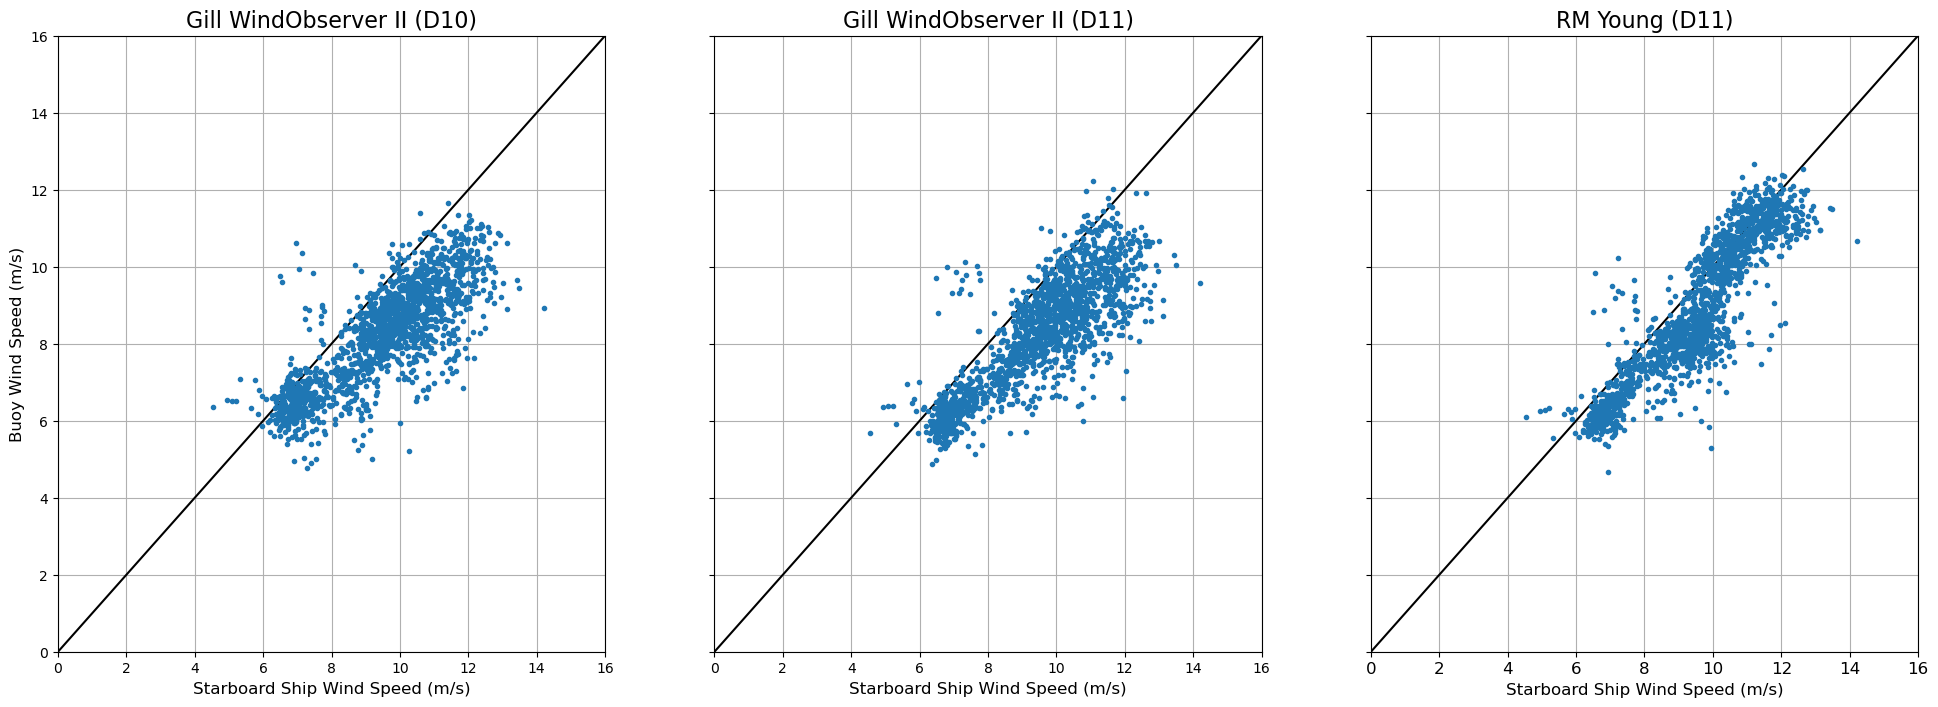

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24, 8), sharey=True)

ax1.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax1.plot(irminger_underway_1min.loc[irminger10_met1_index]['adj_wind_speed_starboard'], irminger10_met1_1min.loc[irminger10_met1_index]['wind_speed'], marker=".", linestyle="", label='Gill WindObserver II')
ax1.set_ylabel('Buoy Wind Speed (m/s)', fontsize=12)
ax1.set_ylim((0, 16))
ax1.set_xlim((0, 16))
ax1.set_xlabel('Starboard Ship Wind Speed (m/s)', fontsize=12)
ax1.set_title('Gill WindObserver II (D10)', fontsize=16)
ax1.grid()

ax2.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax2.plot(irminger_underway_1min.loc[irminger11_met1_index]['adj_wind_speed_starboard'], irminger11_met1_1min.loc[irminger11_met1_index]['wind_speed'], marker=".", linestyle="", label='Gill WindObserver II')
ax2.set_xlabel('Starboard Ship Wind Speed (m/s)', fontsize=12)
ax2.set_title('Gill WindObserver II (D11)', fontsize=16)
ax2.set_ylim((0, 16))
ax2.set_xlim((0, 16))
ax2.grid()

ax3.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax3.plot(irminger_underway_1min.loc[irminger11_met2_index]['adj_wind_speed_starboard'], irminger11_met2_1min.loc[irminger11_met2_index]['wind_speed'], marker=".", linestyle="", label='Gill WindObserver II')
ax3.set_xlabel('Starboard Ship Wind Speed (m/s)', fontsize=12)
ax3.set_title('RM Young (D11)', fontsize=16)
ax3.set_ylim((0, 16))
ax3.set_xlim((0, 16))
ax3.grid()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [40]:
# Calculate the 

In [41]:
fig.savefig('../Comparison_buoy_sensors_vs_ship_starboard_wind.png', transparent=False, facecolor='white', edgecolor="black", bbox_inches='tight')

**Comparison of Gill, RM Young, and FDCHP Gill WindMaster Pro**

In [42]:
ind_fdchp = irminger11_fdchp_1hr_avg.index[irminger11_fdchp_1hr_avg.index > t1]

In [43]:
# Identify the intersection of 
irminger11_met1_index = list(set(irminger11_met1_1hr_avg.index).intersection(ind_fdchp))
irminger11_met2_index = list(set(irminger11_met2_1hr_avg.index).intersection(ind_fdchp))

In [44]:
gill_data = irminger11_met1_1hr_avg.loc[irminger11_met1_index]['wind_speed'].values
young_data = irminger11_met2_1hr_avg.loc[irminger11_met2_index]['wind_speed'].values
fdchp_gill_data =irminger11_fdchp_1hr_avg.loc[irminger11_met1_index]['wind_speed'].values
fdchp_young_data = irminger11_fdchp_1hr_avg.loc[irminger11_met2_index]['wind_speed'].values

# Calculate the regression with a forced intercept of zero
gill_slope = (gill_data * fdchp_gill_data).sum() / (fdchp_gill_data**2).sum()
young_slope = (young_data * fdchp_young_data).sum() / (fdchp_young_data**2).sum()

# Calculate standard linear regression
fdchp_gill_data = np.vstack([fdchp_gill_data, np.ones(len(fdchp_gill_data))]).T
fdchp_young_data = np.vstack([fdchp_young_data, np.ones(len(fdchp_young_data))]).T
gill_reg = np.linalg.lstsq(fdchp_gill_data, gill_data)
young_reg = np.linalg.lstsq(fdchp_young_data, young_data)

C:\Users\areed\AppData\Local\Temp\ipykernel_2624\1746920870.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  gill_reg = np.linalg.lstsq(fdchp_gill_data, gill_data)
C:\Users\areed\AppData\Local\Temp\ipykernel_2624\1746920870.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  young_reg = np.linalg.lstsq(fdchp_young_data, young_data)


In [45]:
young_reg

(array([0.90630111, 0.31354457]),
 array([472.21827916]),
 2,
 array([308.1471012 ,  15.67212556]))

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, -2.5, '−2.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0')])

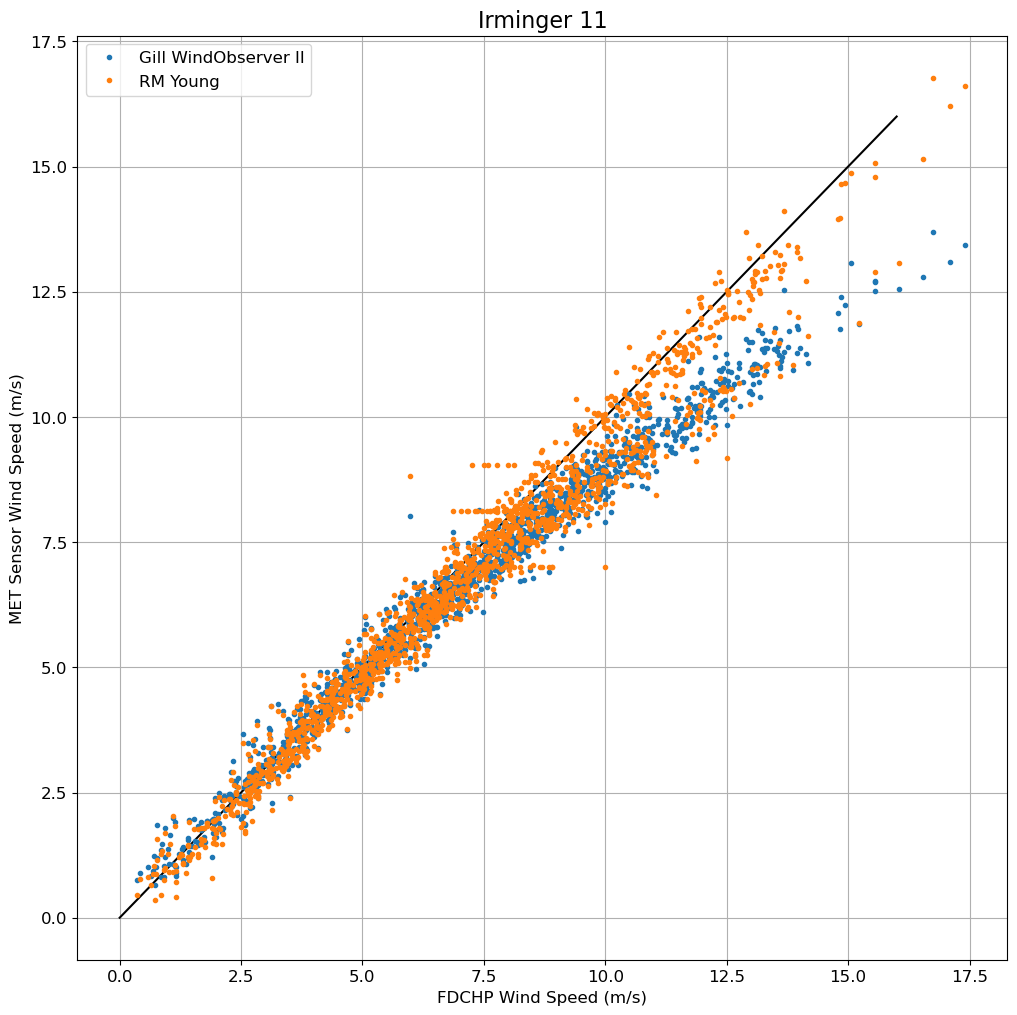

In [46]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax.plot(irminger11_fdchp_1hr_avg.loc[irminger11_met1_index]['wind_speed'], irminger11_met1_1hr_avg.loc[irminger11_met1_index]['wind_speed'], marker=".", linestyle="", label='Gill WindObserver II')
ax.plot(irminger11_fdchp_1hr_avg.loc[irminger11_met2_index]['wind_speed'], irminger11_met2_1hr_avg.loc[irminger11_met2_index]['wind_speed'], marker=".", linestyle="", label='RM Young')
ax.set_ylabel('MET Sensor Wind Speed (m/s)', fontsize=12)
ax.set_xlabel('FDCHP Wind Speed (m/s)', fontsize=12)
ax.set_title('Irminger 11', fontsize=16)
ax.grid()
ax.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [47]:
fig.savefig("../irminger11_gill_young_vs_fdchp.png", transparent=False, facecolor='white', edgecolor="black", bbox_inches='tight')

In [48]:
# Calculate the linear regression line of best fit
x = np.arange(0,16,1)
y_gill = gill_reg[0][0]*x + gill_reg[0][1]
y_young = young_reg[0][0]*x + young_reg[0][1]

y_gill_slope = x*gill_slope
y_young_slope = x*young_slope

Text(0.5, 0.98, 'Irminger 11')

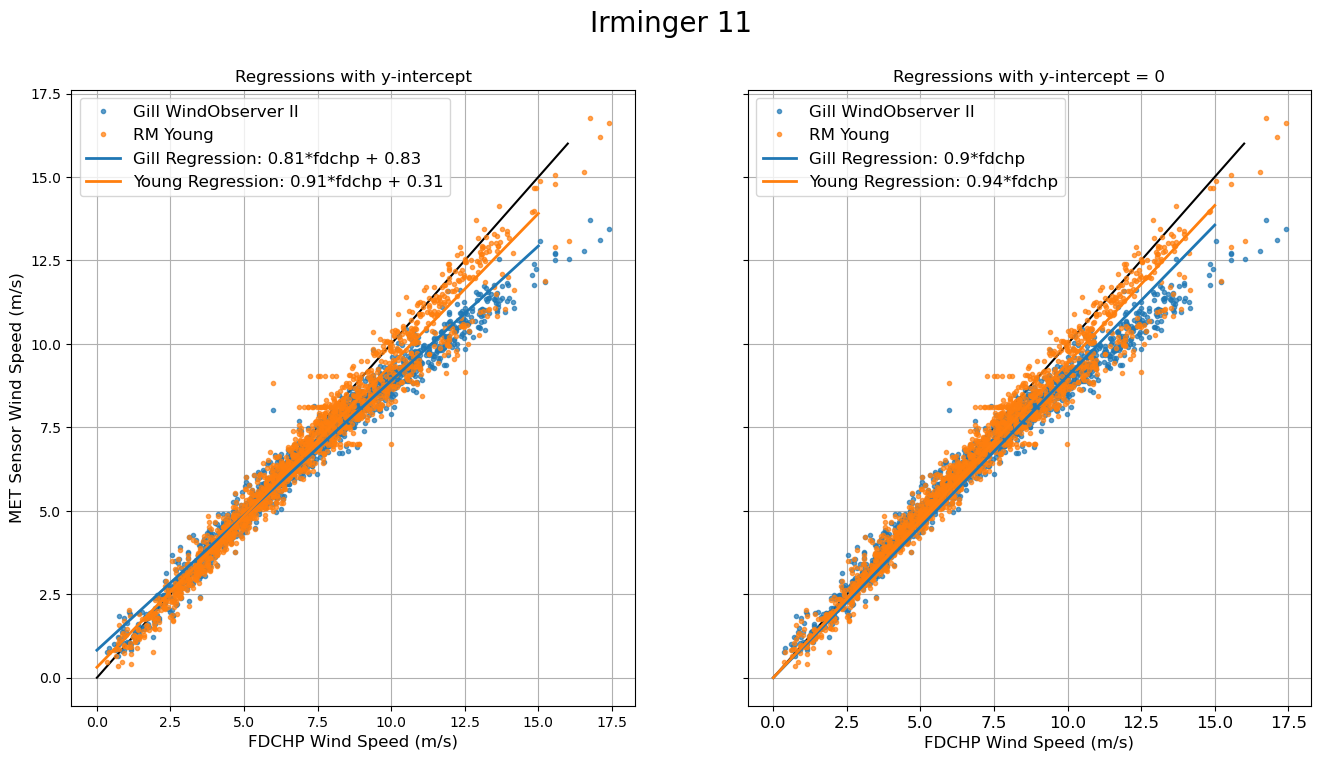

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)


ax1.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax1.plot(irminger11_fdchp_1hr_avg.loc[irminger11_met1_index]['wind_speed'], irminger11_met1_1hr_avg.loc[irminger11_met1_index]['wind_speed'], marker=".", linestyle="", alpha=0.7, color="tab:blue", label='Gill WindObserver II')
ax1.plot(irminger11_fdchp_1hr_avg.loc[irminger11_met2_index]['wind_speed'], irminger11_met2_1hr_avg.loc[irminger11_met2_index]['wind_speed'], marker=".", linestyle="", alpha=0.7, color="tab:orange", label='RM Young')
ax1.plot(x, y_gill, color="tab:blue", linewidth=2, label=f'Gill Regression: {np.round(gill_reg[0][0],2)}*fdchp + {np.round(gill_reg[0][1], 2)}')
ax1.plot(x, y_young, color="tab:orange", linewidth=2, label=f'Young Regression: {np.round(young_reg[0][0],2)}*fdchp + {np.round(young_reg[0][1], 2)}')
#ax.plot(x, gill_slope*x, color = "tab:blue", label=f'Gill regression w/slope {np.round(gill_slope, 2)}')
ax1.set_ylabel('MET Sensor Wind Speed (m/s)', fontsize=12)
ax1.set_xlabel('FDCHP Wind Speed (m/s)', fontsize=12)
ax1.set_title('Regressions with y-intercept', fontsize=12)
ax1.grid()
ax1.legend(fontsize=12)

ax2.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax2.plot(irminger11_fdchp_1hr_avg.loc[irminger11_met1_index]['wind_speed'], irminger11_met1_1hr_avg.loc[irminger11_met1_index]['wind_speed'], marker=".", linestyle="", alpha=0.7, color="tab:blue", label='Gill WindObserver II')
ax2.plot(irminger11_fdchp_1hr_avg.loc[irminger11_met2_index]['wind_speed'], irminger11_met2_1hr_avg.loc[irminger11_met2_index]['wind_speed'], marker=".", linestyle="", alpha=0.7, color="tab:orange", label='RM Young')
ax2.plot(x, y_gill_slope, color="tab:blue", linewidth=2, label=f'Gill Regression: {np.round(gill_slope,2)}*fdchp')
ax2.plot(x, y_young_slope, color="tab:orange", linewidth=2, label=f'Young Regression: {np.round(young_slope,2)}*fdchp')
#ax.plot(x, gill_slope*x, color = "tab:blue", label=f'Gill regression w/slope {np.round(gill_slope, 2)}')
ax2.set_xlabel('FDCHP Wind Speed (m/s)', fontsize=12)
ax2.set_title('Regressions with y-intercept = 0', fontsize=12)
ax2.grid()
ax2.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.suptitle('Irminger 11', fontsize=20)

In [50]:
fig.savefig("../Irminger11_gill_young_vs_fdchp_with_both_regressions.png", transparent=False, facecolor='white', edgecolor="black", bbox_inches='tight')

---
### Pioneer Comparisons

Get the buoy data

In [51]:
# Now lets get the rest of the datasets
# Set the constraints
oms.dataset_id = "CP10CNSM-BUOY-FDCHP-01-1"
oms.constraints = {
    "deploy_id=": "D0001",
    "time>=": '2024-04-03T00:00:00',
    "time<=": '2024-08-01T00:00:01'
}

# Convert the data to a pandas dataframe indexed by time
p20_fdchp = oms.to_pandas(index_col='time (UTC)', parse_dates=True)
p20_fdchp

feature_type_instance  latitude (degrees_north)  \
time (UTC)                                                                  
2024-04-03 00:22:02+00:00              cp10cnsm                  35.94988   
2024-04-03 00:52:02+00:00              cp10cnsm                  35.94988   
2024-04-03 01:22:02+00:00              cp10cnsm                  35.94988   
2024-04-03 01:52:02+00:00              cp10cnsm                  35.94988   
2024-04-03 02:22:02+00:00              cp10cnsm                  35.94988   
...                                         ...                       ...   
2024-07-31 19:21:56+00:00              cp10cnsm                  35.94988   
2024-07-31 20:21:56+00:00              cp10cnsm                  35.94988   
2024-07-31 21:21:55+00:00              cp10cnsm                  35.94988   
2024-07-31 22:21:55+00:00              cp10cnsm                  35.94988   
2024-07-31 23:21:55+00:00              cp10cnsm                  35.94988   

                           longitude (degrees_east)         crs    platform  \
time (UTC)                                                                    
2024-04-03 00:22:02+00:00                 -75.11943 -2147483647 -2147483647   
2024-04-03 00:52:02+00:00                 -75.11943 -2147483647 -2147483647   
2024-04-03 01:22:02+00:00                 -75.11943 -2147483647 -2147483647   
2024-04-03 01:52:02+00:00                 -75.11943 -2147483647 -2147483647   
2024-04-03 02:22:02+00:00                 -75.11943 -2147483647 -2147483647   
...                                             ...         ...         ...   
2024-07-31 19:21:56+00:00                 -75.11943 -2147483647 -2147483647   
2024-07-31 20:21:56+00:00                 -75.11943 -2147483647 -2147483647   
2024-07-31 21:21:55+00:00                 -75.11943 -2147483647 -2147483647   
2024-07-31 22:21:55+00:00                 -75.11943 -2147483647 -2147483647   
2024-07-31 23:21:55+00:00                 -75.11943 -2147483647 -2147483647   

                           depth (m)  acceleration_x (g0)  \
time (UTC)                                                  
2024-04-03 00:22:02+00:00      -4.81                 0.39   
2024-04-03 00:52:02+00:00      -4.81                 0.39   
2024-04-03 01:22:02+00:00      -4.81                 0.39   
2024-04-03 01:52:02+00:00      -4.81                 0.39   
2024-04-03 02:22:02+00:00      -4.81                 0.39   
...                              ...                  ...   
2024-07-31 19:21:56+00:00      -4.81                 0.01   
2024-07-31 20:21:56+00:00      -4.81                 0.02   
2024-07-31 21:21:55+00:00      -4.81                 0.02   
2024-07-31 22:21:55+00:00      -4.81                 0.02   
2024-07-31 23:21:55+00:00      -4.81                 0.02   

                           acceleration_y (g0)  acceleration_z (g0)  \
time (UTC)                                                            
2024-04-03 00:22:02+00:00                -0.74                 0.55   
2024-04-03 00:52:02+00:00                -0.74                 0.55   
2024-04-03 01:22:02+00:00                -0.74                 0.55   
2024-04-03 01:52:02+00:00                -0.74                 0.55   
2024-04-03 02:22:02+00:00                -0.74                 0.55   
...                                        ...                  ...   
2024-07-31 19:21:56+00:00                -0.01                 0.96   
2024-07-31 20:21:56+00:00                -0.01                 0.97   
2024-07-31 21:21:55+00:00                -0.01                 0.97   
2024-07-31 22:21:55+00:00                -0.01                 0.97   
2024-07-31 23:21:55+00:00                -0.01                 0.97   

                           avg_wind_u (m s-1)  ...  std_w_corrected  \
time (UTC)                                     ...                    
2024-04-03 00:22:02+00:00                1.26  ...             0.59   
2024-04-03 00:52:02+00:00                1.00  ...             0.

In [52]:
oms.dataset_id = "CP10CNSM-BUOY-METBK-01-1"
oms.constraints = {
    "deploy_id=": "D0001",
    "time>=": '2024-04-03T00:00:00',
    "time<=": '2024-08-01T00:00:01'
}

# Convert the data to a pandas dataframe indexed by time
p20_met1 = oms.to_pandas(index_col='time (UTC)', parse_dates=True)
p20_met1

latitude (degrees_north)  longitude (degrees_east)  \
time (UTC)                                                                      
2024-04-03 00:00:09+00:00                  35.94988                 -75.11943   
2024-04-03 00:01:15+00:00                  35.94988                 -75.11943   
2024-04-03 00:02:19+00:00                  35.94988                 -75.11943   
2024-04-03 00:02:51+00:00                  35.94988                 -75.11943   
2024-04-03 00:03:56+00:00                  35.94988                 -75.11943   
...                                             ...                       ...   
2024-07-31 23:55:35+00:00                  35.94988                 -75.11943   
2024-07-31 23:56:40+00:00                  35.94988                 -75.11943   
2024-07-31 23:57:44+00:00                  35.94988                 -75.11943   
2024-07-31 23:58:48+00:00                  35.94988                 -75.11943   
2024-07-31 23:59:53+00:00                  35.94988                 -75.11943   

                                  crs  feature_type_instance    platform  \
time (UTC)                                                                 
2024-04-03 00:00:09+00:00 -2147483647                    NaN -2147483647   
2024-04-03 00:01:15+00:00 -2147483647                    NaN -2147483647   
2024-04-03 00:02:19+00:00 -2147483647                    NaN -2147483647   
2024-04-03 00:02:51+00:00 -2147483647                    NaN -2147483647   
2024-04-03 00:03:56+00:00 -2147483647                    NaN -2147483647   
...                               ...                    ...         ...   
2024-07-31 23:55:35+00:00 -2147483647                    NaN -2147483647   
2024-07-31 23:56:40+00:00 -2147483647                    NaN -2147483647   
2024-07-31 23:57:44+00:00 -2147483647                    NaN -2147483647   
2024-07-31 23:58:48+00:00 -2147483647                    NaN -2147483647   
2024-07-31 23:59:53+00:00 -2147483647                    NaN -2147483647   

                           air_temperature (degrees_Celsius)  \
time (UTC)                                                     
2024-04-03 00:00:09+00:00                              9.646   
2024-04-03 00:01:15+00:00                              9.594   
2024-04-03 00:02:19+00:00                              9.601   
2024-04-03 00:02:51+00:00                              9.624   
2024-04-03 00:03:56+00:00                              9.646   
...                                                      ...   
2024-07-31 23:55:35+00:00                             26.691   
2024-07-31 23:56:40+00:00                             26.691   
2024-07-31 23:57:44+00:00                             26.646   
2024-07-31 23:58:48+00:00                             26.646   
2024-07-31 23:59:53+00:00                             26.638   

                           barometric_pressure (mbar)  \
time (UTC)                                              
2024-04-03 00:00:09+00:00                     1005.02   
2024-04-03 00:01:15+00:00                     1005.02   
2024-04-03 00:02:19+00:00                     1005.08   
2024-04-03 00:02:51+00:00                     1004.95   
2024-04-03 00:03:56+00:00                     1004.95   
...                                               ...   
2024-07-31 23:55:35+00:00                     1009.70   
2024-07-31 23:56:40+00:00                     1009.84   
2024-07-31 23:57:44+00:00                     1009.91   
2024-07-31 23:58:48+00:00                     1009.98   
2024-07-31 23:59:53+00:00                     1009.70   

                           eastward_wind_velocity (m s-1)  \
time (UTC)                                                  
2024-04-03 00:00:09+00:00                            1.76   
2024-04-03 00:01:15+00:00                            2.01   
2024-04-03 00:02:19+00:00                            2.09   
2024-04-03 00:02:51+00:00                            1.86   
2024-04-03 00:03:56+00:00                  

In [53]:
oms.dataset_id = "CP10CNSM-BUOY-METBK-02-1"
oms.constraints = {
    "deploy_id=": "D0001",
    "time>=": '2024-04-03T00:00:00',
    "time<=": '2024-08-01T00:00:01'
}

# Convert the data to a pandas dataframe indexed by time
p20_met2 = oms.to_pandas(index_col='time (UTC)', parse_dates=True)
p20_met2

latitude (degrees_north)  longitude (degrees_east)  \
time (UTC)                                                                      
2024-04-03 00:00:46+00:00                  35.94988                 -75.11943   
2024-04-03 00:01:52+00:00                  35.94988                 -75.11943   
2024-04-03 00:02:57+00:00                  35.94988                 -75.11943   
2024-04-03 00:04:01+00:00                  35.94988                 -75.11943   
2024-04-03 00:04:33+00:00                  35.94988                 -75.11943   
...                                             ...                       ...   
2024-07-31 23:55:54+00:00                  35.94988                 -75.11943   
2024-07-31 23:56:58+00:00                  35.94988                 -75.11943   
2024-07-31 23:57:31+00:00                  35.94988                 -75.11943   
2024-07-31 23:58:35+00:00                  35.94988                 -75.11943   
2024-07-31 23:59:39+00:00                  35.94988                 -75.11943   

                                  crs  feature_type_instance    platform  \
time (UTC)                                                                 
2024-04-03 00:00:46+00:00 -2147483647                    NaN -2147483647   
2024-04-03 00:01:52+00:00 -2147483647                    NaN -2147483647   
2024-04-03 00:02:57+00:00 -2147483647                    NaN -2147483647   
2024-04-03 00:04:01+00:00 -2147483647                    NaN -2147483647   
2024-04-03 00:04:33+00:00 -2147483647                    NaN -2147483647   
...                               ...                    ...         ...   
2024-07-31 23:55:54+00:00 -2147483647                    NaN -2147483647   
2024-07-31 23:56:58+00:00 -2147483647                    NaN -2147483647   
2024-07-31 23:57:31+00:00 -2147483647                    NaN -2147483647   
2024-07-31 23:58:35+00:00 -2147483647                    NaN -2147483647   
2024-07-31 23:59:39+00:00 -2147483647                    NaN -2147483647   

                           air_temperature (degrees_Celsius)  \
time (UTC)                                                     
2024-04-03 00:00:46+00:00                              9.685   
2024-04-03 00:01:52+00:00                              9.693   
2024-04-03 00:02:57+00:00                              9.723   
2024-04-03 00:04:01+00:00                              9.731   
2024-04-03 00:04:33+00:00                              9.753   
...                                                      ...   
2024-07-31 23:55:54+00:00                             26.662   
2024-07-31 23:56:58+00:00                             26.647   
2024-07-31 23:57:31+00:00                             26.609   
2024-07-31 23:58:35+00:00                             26.617   
2024-07-31 23:59:39+00:00                             26.602   

                           barometric_pressure (mbar)  \
time (UTC)                                              
2024-04-03 00:00:46+00:00                     1005.22   
2024-04-03 00:01:52+00:00                     1005.15   
2024-04-03 00:02:57+00:00                     1005.15   
2024-04-03 00:04:01+00:00                     1005.15   
2024-04-03 00:04:33+00:00                     1005.36   
...                                               ...   
2024-07-31 23:55:54+00:00                     1014.87   
2024-07-31 23:56:58+00:00                     1014.81   
2024-07-31 23:57:31+00:00                     1014.74   
2024-07-31 23:58:35+00:00                     1014.94   
2024-07-31 23:59:39+00:00                     1014.67   

                           eastward_wind_velocity (m s-1)  \
time (UTC)                                                  
2024-04-03 00:00:46+00:00                            1.72   
2024-04-03 00:01:52+00:00                            1.80   
2024-04-03 00:02:57+00:00                            1.88   
2024-04-03 00:04:01+00:00                            1.77   
2024-04-03 00:04:33+00:00                  

In [54]:
# Calculate the U10 and ustar 
U10, ustar = dragNC35(17.9, p20_underway["wind_speed_starboard"].values)

# Add the ustar to the underway data
p20_underway["friction_velocity_starboard"] = (["time"], ustar)
p20_underway["friction_velocity_starboard"].attrs = {
    'standard_name': 'friction_velocity',
    'long_name': 'Friction Velocity - Starboard',
    'units': 'm s-1',
    'comment': ('Friction velocity is a reference wind velocity that relates the Reynold\'s stress with the density. It is '
                'applied to motion near the ground where the shearing stress is assumed to be independent of height and '
                'proportional to the square of the mean velocity.')
}

# Calculate the adjusted wind speed
wspd = p20_underway["wind_speed_starboard"]
ustar = p20_underway["friction_velocity_starboard"]
p20_underway["adj_wind_speed_starboard"] = adjust_height(wspd, ustar, 17.9, 5.45)
p20_underway["adj_wind_speed_starboard"]


# Repeat for the port sensor
U10, ustar = dragNC35(17.9, p20_underway["wind_speed_port"].values)

p20_underway["friction_velocity_port"] = (["time"], ustar)
p20_underway["friction_velocity_port"].attrs = {
    'standard_name': 'friction_velocity',
    'long_name': 'Friction Velocity - Port',
    'units': 'm s-1',
    'comment': ('Friction velocity is a reference wind velocity that relates the Reynold\'s stress with the density. It is '
                'applied to motion near the ground where the shearing stress is assumed to be independent of height and '
                'proportional to the square of the mean velocity.')
}

# Calculate the adjusted wind speed
wspd = p20_underway["wind_speed_port"]
ustar = p20_underway["friction_velocity_port"]
p20_underway["adj_wind_speed_port"] = adjust_height(wspd, ustar, 17.9, 5.45)
p20_underway["adj_wind_speed_port"]

<xarray.DataArray 'adj_wind_speed_port' (time: 17364)>
array([       nan,        nan,        nan, ..., 8.64416128, 6.9823463 ,
       8.12203595])
Coordinates:
  * time     (time) datetime64[ns] 2024-03-29T14:50:32.803000 ... 2024-04-10T...

Calculate wind speed and direction for the met sensors

In [55]:
wspd, wdir = wind_speed_and_direction(p20_met1['eastward_wind_velocity (m s-1)'], p20_met1['northward_wind_velocity (m s-1)'])
p20_met1['wind_speed'] = wspd
p20_met1['wind_direction'] = wdir

wspd, wdir = wind_speed_and_direction(p20_met2['eastward_wind_velocity (m s-1)'], p20_met2['northward_wind_velocity (m s-1)'])
p20_met2['wind_speed'] = wspd
p20_met2['wind_direction'] = wdir

Remove stuck values for the RM Young

In [56]:
mask = (p20_met2["wind_speed"] == p20_met2["wind_speed"].mode().values[0])
p20_met2[mask] = np.nan
p20_met2.dropna(how='all', inplace=True)

Resample and average to 1-hour intervals

In [57]:
# Drop non-numeric columns
p20_met1 = p20_met1.drop(columns=['deploy_id (1)'])
p20_met2 = p20_met2.drop(columns=['deploy_id (1)'])
p20_fdchp = p20_fdchp.drop(columns=['deploy_id (1)', 'dcl_date_time_string (1)', 'feature_type_instance'])

In [58]:
# Calculate the 1 hr averages
p20_met1_1hr_avg = p20_met1.resample('1H').mean()
p20_met2_1hr_avg = p20_met2.resample('1H').mean()
p20_fdchp_1hr_avg = p20_fdchp.resample('1H').mean()

# Calculate the 1 hr standard deviations
p20_met1_1hr_std = p20_met1.resample('1H').std()
p20_met2_1hr_std = p20_met2.resample('1H').std()
p20_fdchp_1hr_std = p20_fdchp.resample('1H').std()

C:\Users\areed\AppData\Local\Temp\ipykernel_2624\2013123623.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  p20_met1_1hr_avg = p20_met1.resample('1H').mean()
C:\Users\areed\AppData\Local\Temp\ipykernel_2624\2013123623.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  p20_met2_1hr_avg = p20_met2.resample('1H').mean()
C:\Users\areed\AppData\Local\Temp\ipykernel_2624\2013123623.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  p20_fdchp_1hr_avg = p20_fdchp.resample('1H').mean()
C:\Users\areed\AppData\Local\Temp\ipykernel_2624\2013123623.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  p20_met1_1hr_std = p20_met1.resample('1H').std()
C:\Users\areed\AppData\Local\Temp\ipykernel_2624\2013123623.py:8: FutureWarning: 'H' is deprecated and will be removed in a future vers

In [59]:
# Calculate the underway 1 hr averages and standard deviations
p20_underway_1hr_avg = p20_underway.resample(time='1H').mean()
p20_underway_1hr_avg["time"] = pd.to_datetime(p20_underway_1hr_avg.time)
p20_underway_1hr_std = p20_underway.resample(time='1H').std()
p20_underway_1hr_std["time"] =pd.to_datetime(p20_underway_1hr_std.time)


C:\Users\areed\AppData\Local\miniconda3\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_grouper = pd.Grouper(
C:\Users\areed\AppData\Local\miniconda3\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_grouper = pd.Grouper(


### Ship Comparisons

MET Comparison: April 3rd 12:00 UTC (when CTD Cast #6 started at the central site) through April 4th 12:00 UTC

In [60]:
t1 = "2024-04-03T18:30:00"
t2 = "2024-04-04T18:00:00"

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(0, -2.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16')])

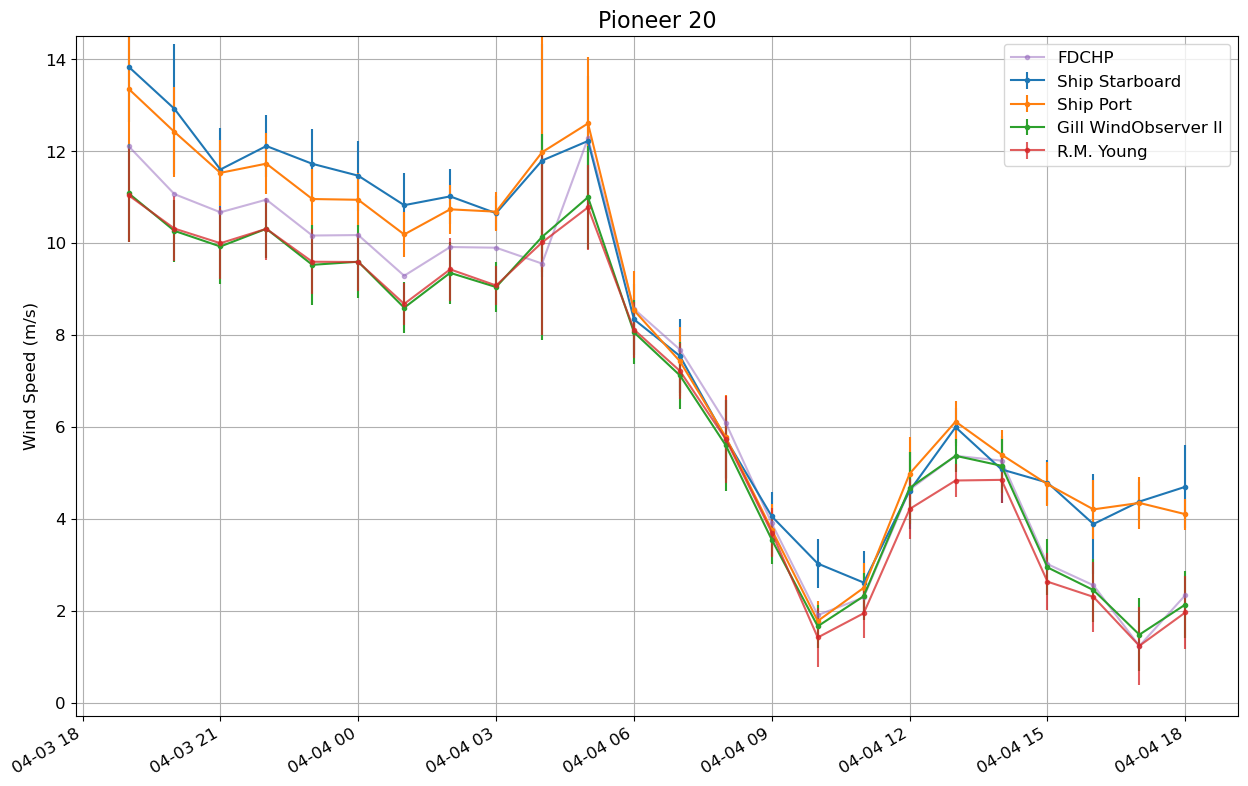

In [61]:
# Plot the full time comparison
fig, ax = plt.subplots(figsize=(15, 10))

ax.errorbar(p20_underway_1hr_avg.sel(time=slice(t1,t2))["time"].values, p20_underway_1hr_avg.sel(time=slice(t1,t2))["adj_wind_speed_starboard"], p20_underway_1hr_std.sel(time=slice(t1,t2))["adj_wind_speed_starboard"],
            marker=".", label="Ship Starboard")
ax.errorbar(p20_underway_1hr_avg.sel(time=slice(t1,t2))["time"].values, p20_underway_1hr_avg.sel(time=slice(t1,t2))["adj_wind_speed_port"], p20_underway_1hr_std.sel(time=slice(t1,t2))["adj_wind_speed_port"],
        marker=".", label="Ship Port")
ax.errorbar(p20_met1_1hr_avg.loc[slice(t1,t2)].index, p20_met1_1hr_avg.loc[slice(t1,t2)]['wind_speed'], p20_met1_1hr_std.loc[slice(t1,t2)]['wind_speed'],
            marker=".", label='Gill WindObserver II')
ax.errorbar(p20_met2_1hr_avg.loc[slice(t1,t2)].index, p20_met2_1hr_avg.loc[slice(t1,t2)]['wind_speed'], p20_met2_1hr_std.loc[slice(t1,t2)]['wind_speed'], 
        marker=".", alpha=0.75, label='R.M. Young')
ax.plot(p20_fdchp_1hr_avg.loc[slice(t1,t2)].index, p20_fdchp_1hr_avg.loc[slice(t1,t2)]['wind_speed'], marker=".", alpha=0.5, label='FDCHP')
ax.set_ylabel('Wind Speed (m/s)', fontsize=12)
ax.set_title('Pioneer 20', fontsize=16)
ax.grid()
ax.legend(fontsize=12)

fig.autofmt_xdate()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [62]:
fig.savefig("../Pioneer20_timeseries_ship_comparison.png", transparent=False, facecolor='white', edgecolor="black", bbox_inches='tight')

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5]),
 [Text(0, -2.5, '−2.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5')])

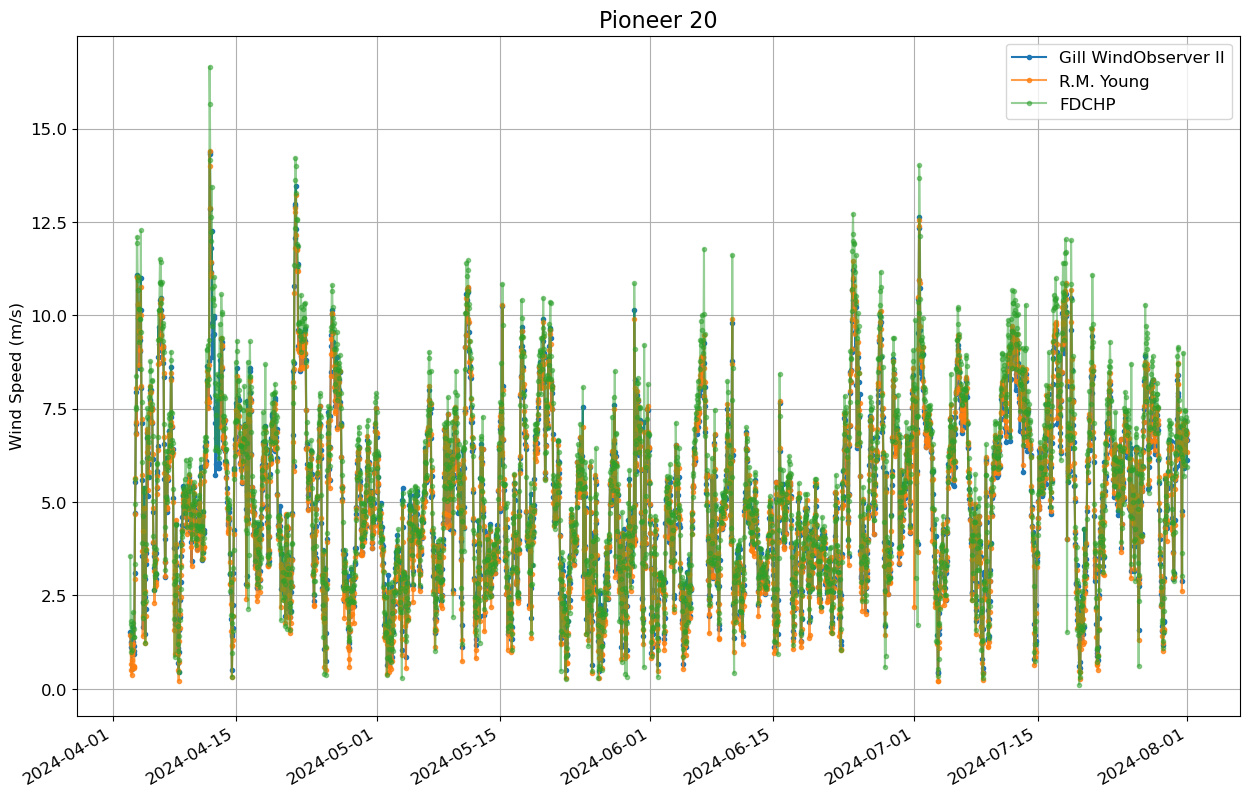

In [63]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(p20_met1_1hr_avg.index, p20_met1_1hr_avg['wind_speed'], color="tab:blue", marker=".", label='Gill WindObserver II')
ax.plot(p20_met2_1hr_avg.index, p20_met2_1hr_avg['wind_speed'], color="tab:orange", marker=".", alpha=0.75, label='R.M. Young')
ax.plot(p20_fdchp_1hr_avg.index, p20_fdchp_1hr_avg['wind_speed'], color="tab:green", marker=".", alpha=0.5, label='FDCHP')
ax.set_ylabel('Wind Speed (m/s)', fontsize=12)
ax.set_title('Pioneer 20', fontsize=16)
ax.grid()
ax.legend(fontsize=12)

fig.autofmt_xdate()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [64]:
fig.savefig("../Pioneer20_timeseries.png", transparent=False, facecolor='white', edgecolor="black", bbox_inches='tight')

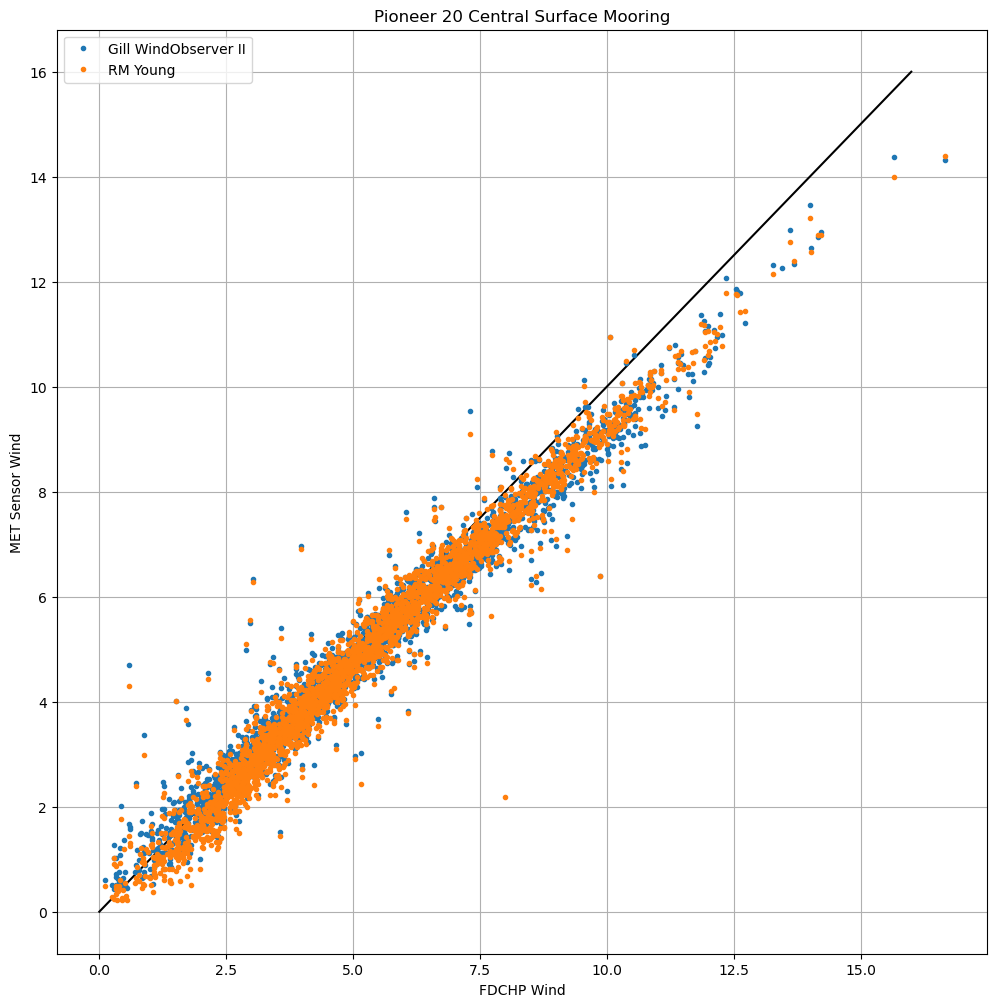

In [65]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax.plot(p20_fdchp_1hr_avg['wind_speed'], p20_met1_1hr_avg['wind_speed'], marker=".", linestyle="", label='Gill WindObserver II')
ax.plot(p20_fdchp_1hr_avg['wind_speed'], p20_met2_1hr_avg['wind_speed'], marker=".", linestyle="", label='RM Young')
ax.set_ylabel('MET Sensor Wind')
ax.set_xlabel('FDCHP Wind')
ax.set_title('Pioneer 20 Central Surface Mooring')
ax.grid()
ax.legend()

In [66]:
fig.savefig("../Pioneer20_gill_young_vs_fdchp.png", transparent=False, facecolor='white', edgecolor="black", bbox_inches='tight')

In [67]:
p20_fdchp_1hr_avg.dropna(subset='wind_speed', inplace=True)
p20_met1_1hr_avg.dropna(subset='wind_speed', inplace=True)
p20_met2_1hr_avg.dropna(subset='wind_speed', inplace=True)

In [68]:
met1_index = [x for x in p20_fdchp_1hr_avg.index if x in p20_met1_1hr_avg.index]
met2_index = [x for x in p20_fdchp_1hr_avg.index if x in p20_met2_1hr_avg.index]

In [69]:
p20_gill_data = p20_met1_1hr_avg['wind_speed'][met1_index].values
p20_young_data = p20_met2_1hr_avg['wind_speed'][met2_index].values
p20_fdchp_gill_data = p20_fdchp_1hr_avg['wind_speed'][met1_index].values
p20_fdchp_young_data = p20_fdchp_1hr_avg['wind_speed'][met2_index].values


# Calculate the regression with a forced intercept of zero
p20_gill_slope = (p20_gill_data * p20_fdchp_gill_data).sum() / (p20_fdchp_gill_data**2).sum()
p20_young_slope = (p20_young_data * p20_fdchp_young_data).sum() / (p20_fdchp_young_data**2).sum()

# Calculate standard linear regression
p20_fdchp_gill_data = np.vstack([p20_fdchp_gill_data, np.ones(len(p20_fdchp_gill_data))]).T
p20_fdchp_young_data = np.vstack([p20_fdchp_young_data, np.ones(len(p20_fdchp_young_data))]).T
p20_gill_reg = np.linalg.lstsq(p20_fdchp_gill_data, p20_gill_data)
p20_young_reg = np.linalg.lstsq(p20_fdchp_young_data, p20_young_data)

C:\Users\areed\AppData\Local\Temp\ipykernel_2624\1242369833.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  p20_gill_reg = np.linalg.lstsq(p20_fdchp_gill_data, p20_gill_data)
C:\Users\areed\AppData\Local\Temp\ipykernel_2624\1242369833.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  p20_young_reg = np.linalg.lstsq(p20_fdchp_young_data, p20_young_data)


In [70]:
# Calculate the linear regression line of best fit
x = np.arange(0,16,1)
p20_y_gill = p20_gill_reg[0][0]*x + p20_gill_reg[0][1]
p20_y_young = p20_young_reg[0][0]*x + p20_young_reg[0][1]

p20_y_gill_slope = p20_gill_slope*x
p20_y_young_slope = p20_young_slope*x

Text(0.5, 0.98, 'Pioneer 20')

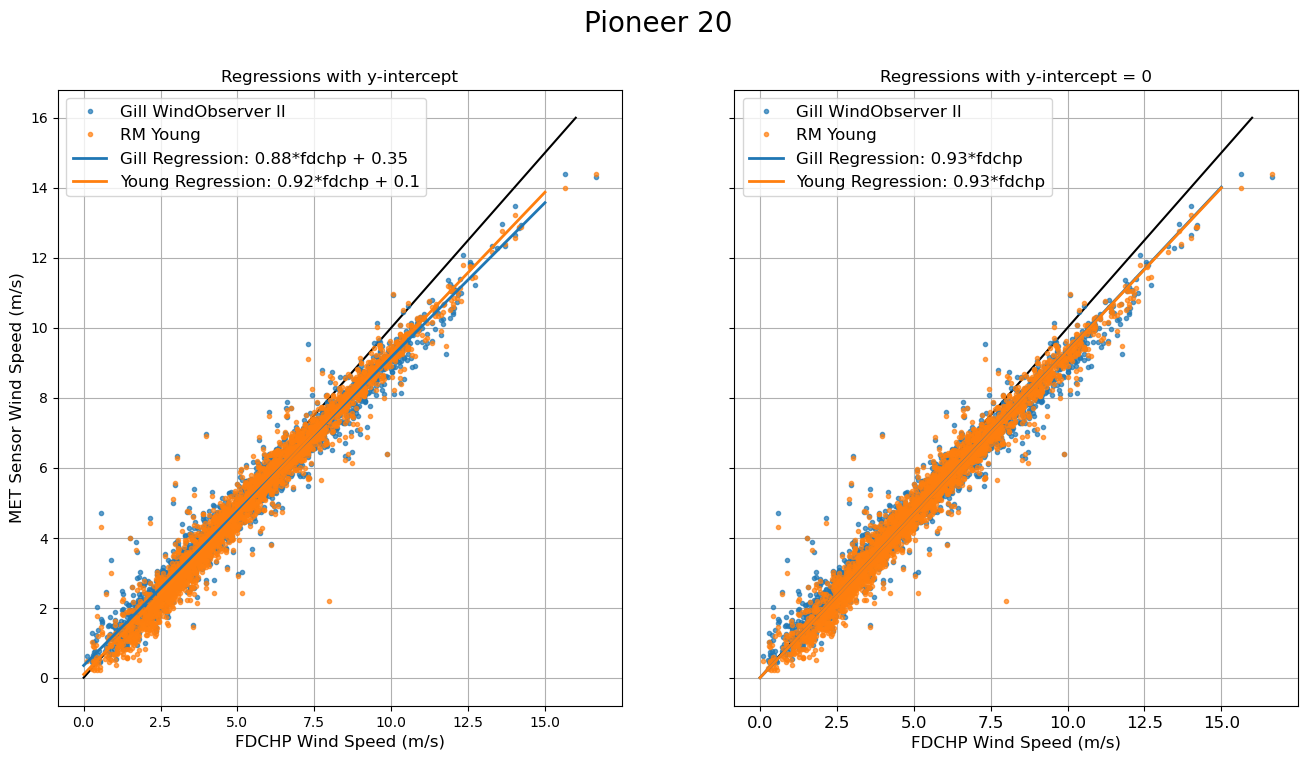

In [71]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)


ax1.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax1.plot(p20_fdchp_1hr_avg['wind_speed'][met1_index], p20_met1_1hr_avg['wind_speed'][met1_index], marker=".", linestyle="", alpha=0.7, color="tab:blue", label='Gill WindObserver II')
ax1.plot(p20_fdchp_1hr_avg['wind_speed'][met2_index], p20_met2_1hr_avg['wind_speed'][met2_index], marker=".", linestyle="", alpha=0.7, color="tab:orange", label='RM Young')
ax1.plot(x, p20_y_gill, color="tab:blue", linewidth=2, label=f'Gill Regression: {np.round(p20_gill_reg[0][0],2)}*fdchp + {np.round(p20_gill_reg[0][1], 2)}')
ax1.plot(x, p20_y_young, color="tab:orange", linewidth=2, label=f'Young Regression: {np.round(p20_young_reg[0][0],2)}*fdchp + {np.round(p20_young_reg[0][1], 2)}')
#ax.plot(x, gill_slope*x, color = "tab:blue", label=f'Gill regression w/slope {np.round(gill_slope, 2)}')
ax1.set_ylabel('MET Sensor Wind Speed (m/s)', fontsize=12)
ax1.set_xlabel('FDCHP Wind Speed (m/s)', fontsize=12)
ax1.set_title('Regressions with y-intercept', fontsize=12)
ax1.grid()
ax1.legend(fontsize=12)

ax2.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax2.plot(p20_fdchp_1hr_avg['wind_speed'][met1_index], p20_met1_1hr_avg['wind_speed'][met1_index], marker=".", linestyle="", alpha=0.7, color="tab:blue", label='Gill WindObserver II')
ax2.plot(p20_fdchp_1hr_avg['wind_speed'][met2_index], p20_met2_1hr_avg['wind_speed'][met2_index], marker=".", linestyle="", alpha=0.7, color="tab:orange", label='RM Young')
ax2.plot(x, p20_y_gill_slope, color="tab:blue", linewidth=2, label=f'Gill Regression: {np.round(p20_gill_slope,2)}*fdchp')
ax2.plot(x, p20_y_young_slope, color="tab:orange", linewidth=2, label=f'Young Regression: {np.round(p20_young_slope,2)}*fdchp')
#ax.plot(x, gill_slope*x, color = "tab:blue", label=f'Gill regression w/slope {np.round(gill_slope, 2)}')
ax2.set_xlabel('FDCHP Wind Speed (m/s)', fontsize=12)
ax2.set_title("Regressions with y-intercept = 0", fontsize=12)
ax2.grid()
ax2.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.suptitle('Pioneer 20', fontsize=20)

In [72]:
fig.savefig("../Pioneer20_gill_young_vs_fdchp_with_regressions.png", transparent=False, facecolor='white', edgecolor="black", bbox_inches='tight')

In [73]:
# Plot the regression of the Gill vs RM Young
p20_met1

latitude (degrees_north)  longitude (degrees_east)  \
time (UTC)                                                                      
2024-04-03 00:00:09+00:00                  35.94988                 -75.11943   
2024-04-03 00:01:15+00:00                  35.94988                 -75.11943   
2024-04-03 00:02:19+00:00                  35.94988                 -75.11943   
2024-04-03 00:02:51+00:00                  35.94988                 -75.11943   
2024-04-03 00:03:56+00:00                  35.94988                 -75.11943   
...                                             ...                       ...   
2024-07-31 23:55:35+00:00                  35.94988                 -75.11943   
2024-07-31 23:56:40+00:00                  35.94988                 -75.11943   
2024-07-31 23:57:44+00:00                  35.94988                 -75.11943   
2024-07-31 23:58:48+00:00                  35.94988                 -75.11943   
2024-07-31 23:59:53+00:00                  35.94988                 -75.11943   

                                  crs  feature_type_instance    platform  \
time (UTC)                                                                 
2024-04-03 00:00:09+00:00 -2147483647                    NaN -2147483647   
2024-04-03 00:01:15+00:00 -2147483647                    NaN -2147483647   
2024-04-03 00:02:19+00:00 -2147483647                    NaN -2147483647   
2024-04-03 00:02:51+00:00 -2147483647                    NaN -2147483647   
2024-04-03 00:03:56+00:00 -2147483647                    NaN -2147483647   
...                               ...                    ...         ...   
2024-07-31 23:55:35+00:00 -2147483647                    NaN -2147483647   
2024-07-31 23:56:40+00:00 -2147483647                    NaN -2147483647   
2024-07-31 23:57:44+00:00 -2147483647                    NaN -2147483647   
2024-07-31 23:58:48+00:00 -2147483647                    NaN -2147483647   
2024-07-31 23:59:53+00:00 -2147483647                    NaN -2147483647   

                           air_temperature (degrees_Celsius)  \
time (UTC)                                                     
2024-04-03 00:00:09+00:00                              9.646   
2024-04-03 00:01:15+00:00                              9.594   
2024-04-03 00:02:19+00:00                              9.601   
2024-04-03 00:02:51+00:00                              9.624   
2024-04-03 00:03:56+00:00                              9.646   
...                                                      ...   
2024-07-31 23:55:35+00:00                             26.691   
2024-07-31 23:56:40+00:00                             26.691   
2024-07-31 23:57:44+00:00                             26.646   
2024-07-31 23:58:48+00:00                             26.646   
2024-07-31 23:59:53+00:00                             26.638   

                           barometric_pressure (mbar)  \
time (UTC)                                              
2024-04-03 00:00:09+00:00                     1005.02   
2024-04-03 00:01:15+00:00                     1005.02   
2024-04-03 00:02:19+00:00                     1005.08   
2024-04-03 00:02:51+00:00                     1004.95   
2024-04-03 00:03:56+00:00                     1004.95   
...                                               ...   
2024-07-31 23:55:35+00:00                     1009.70   
2024-07-31 23:56:40+00:00                     1009.84   
2024-07-31 23:57:44+00:00                     1009.91   
2024-07-31 23:58:48+00:00                     1009.98   
2024-07-31 23:59:53+00:00                     1009.70   

                           eastward_wind_velocity (m s-1)  \
time (UTC)                                                  
2024-04-03 00:00:09+00:00                            1.76   
2024-04-03 00:01:15+00:00                            2.01   
2024-04-03 00:02:19+00:00                            2.09   
2024-04-03 00:02:51+00:00                            1.86   
2024-04-03 00:03:56+00:00                  

In [74]:
p20_met2

latitude (degrees_north)  longitude (degrees_east)  \
time (UTC)                                                                      
2024-04-03 00:00:46+00:00                  35.94988                 -75.11943   
2024-04-03 00:01:52+00:00                  35.94988                 -75.11943   
2024-04-03 00:02:57+00:00                  35.94988                 -75.11943   
2024-04-03 00:04:01+00:00                  35.94988                 -75.11943   
2024-04-03 00:04:33+00:00                  35.94988                 -75.11943   
...                                             ...                       ...   
2024-07-31 23:55:54+00:00                  35.94988                 -75.11943   
2024-07-31 23:56:58+00:00                  35.94988                 -75.11943   
2024-07-31 23:57:31+00:00                  35.94988                 -75.11943   
2024-07-31 23:58:35+00:00                  35.94988                 -75.11943   
2024-07-31 23:59:39+00:00                  35.94988                 -75.11943   

                                    crs  feature_type_instance      platform  \
time (UTC)                                                                     
2024-04-03 00:00:46+00:00 -2.147484e+09                    NaN -2.147484e+09   
2024-04-03 00:01:52+00:00 -2.147484e+09                    NaN -2.147484e+09   
2024-04-03 00:02:57+00:00 -2.147484e+09                    NaN -2.147484e+09   
2024-04-03 00:04:01+00:00 -2.147484e+09                    NaN -2.147484e+09   
2024-04-03 00:04:33+00:00 -2.147484e+09                    NaN -2.147484e+09   
...                                 ...                    ...           ...   
2024-07-31 23:55:54+00:00 -2.147484e+09                    NaN -2.147484e+09   
2024-07-31 23:56:58+00:00 -2.147484e+09                    NaN -2.147484e+09   
2024-07-31 23:57:31+00:00 -2.147484e+09                    NaN -2.147484e+09   
2024-07-31 23:58:35+00:00 -2.147484e+09                    NaN -2.147484e+09   
2024-07-31 23:59:39+00:00 -2.147484e+09                    NaN -2.147484e+09   

                           air_temperature (degrees_Celsius)  \
time (UTC)                                                     
2024-04-03 00:00:46+00:00                              9.685   
2024-04-03 00:01:52+00:00                              9.693   
2024-04-03 00:02:57+00:00                              9.723   
2024-04-03 00:04:01+00:00                              9.731   
2024-04-03 00:04:33+00:00                              9.753   
...                                                      ...   
2024-07-31 23:55:54+00:00                             26.662   
2024-07-31 23:56:58+00:00                             26.647   
2024-07-31 23:57:31+00:00                             26.609   
2024-07-31 23:58:35+00:00                             26.617   
2024-07-31 23:59:39+00:00                             26.602   

                           barometric_pressure (mbar)  \
time (UTC)                                              
2024-04-03 00:00:46+00:00                     1005.22   
2024-04-03 00:01:52+00:00                     1005.15   
2024-04-03 00:02:57+00:00                     1005.15   
2024-04-03 00:04:01+00:00                     1005.15   
2024-04-03 00:04:33+00:00                     1005.36   
...                                               ...   
2024-07-31 23:55:54+00:00                     1014.87   
2024-07-31 23:56:58+00:00                     1014.81   
2024-07-31 23:57:31+00:00                     1014.74   
2024-07-31 23:58:35+00:00                     1014.94   
2024-07-31 23:59:39+00:00                     1014.67   

                           eastward_wind_velocity (m s-1)  \
time (UTC)                                                  
2024-04-03 00:00:46+00:00                            1.72   
2024-04-03 00:01:52+00:00                            1.80   
2024-04-03 00:02:57+00:00                            1.88   
2024-04-03 00:04:01+00:00                           

#### Try breakpoint at 8 m/s

In [75]:
gill_mask = p20_fdchp_gill_data[:,0] < 8
young_mask = p20_fdchp_young_data[:,0] < 8

p20_gill_sub8 = p20_gill_data[gill_mask]
p20_gill_over8 = p20_gill_data[~gill_mask]

p20_young_sub8 = p20_young_data[young_mask]
p20_young_over8 = p20_young_data[~young_mask]

In [76]:
p20_gill_reg_sub8 = np.linalg.lstsq(p20_fdchp_gill_data[gill_mask], p20_gill_data[gill_mask])
p20_gill_reg_over8 = np.linalg.lstsq(p20_fdchp_gill_data[~gill_mask], p20_gill_data[~gill_mask])

p20_young_reg_sub8 = np.linalg.lstsq(p20_fdchp_young_data[young_mask], p20_young_data[young_mask])
p20_young_reg_over8 = np.linalg.lstsq(p20_fdchp_young_data[~young_mask], p20_young_data[~young_mask])

p20_y_gill_sub8 = p20_gill_reg_sub8[0][0]*x + p20_gill_reg_sub8[0][1]
p20_y_gill_over8 = p20_gill_reg_over8[0][0]*x + p20_gill_reg_over8[0][1]

p20_y_young_sub8 = p20_young_reg_sub8[0][0]*x + p20_young_reg_sub8[0][1]
p20_y_young_over8 = p20_young_reg_over8[0][0]*x + p20_young_reg_over8[0][1]

C:\Users\areed\AppData\Local\Temp\ipykernel_2624\768457158.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  p20_gill_reg_sub8 = np.linalg.lstsq(p20_fdchp_gill_data[gill_mask], p20_gill_data[gill_mask])
C:\Users\areed\AppData\Local\Temp\ipykernel_2624\768457158.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  p20_gill_reg_over8 = np.linalg.lstsq(p20_fdchp_gill_data[~gill_mask], p20_gill_data[~gill_mask])
C:\Users\areed\AppData\Local\Temp\ipykernel_2624\768457158.py:4: FutureWarning: `rcond` parameter will change t

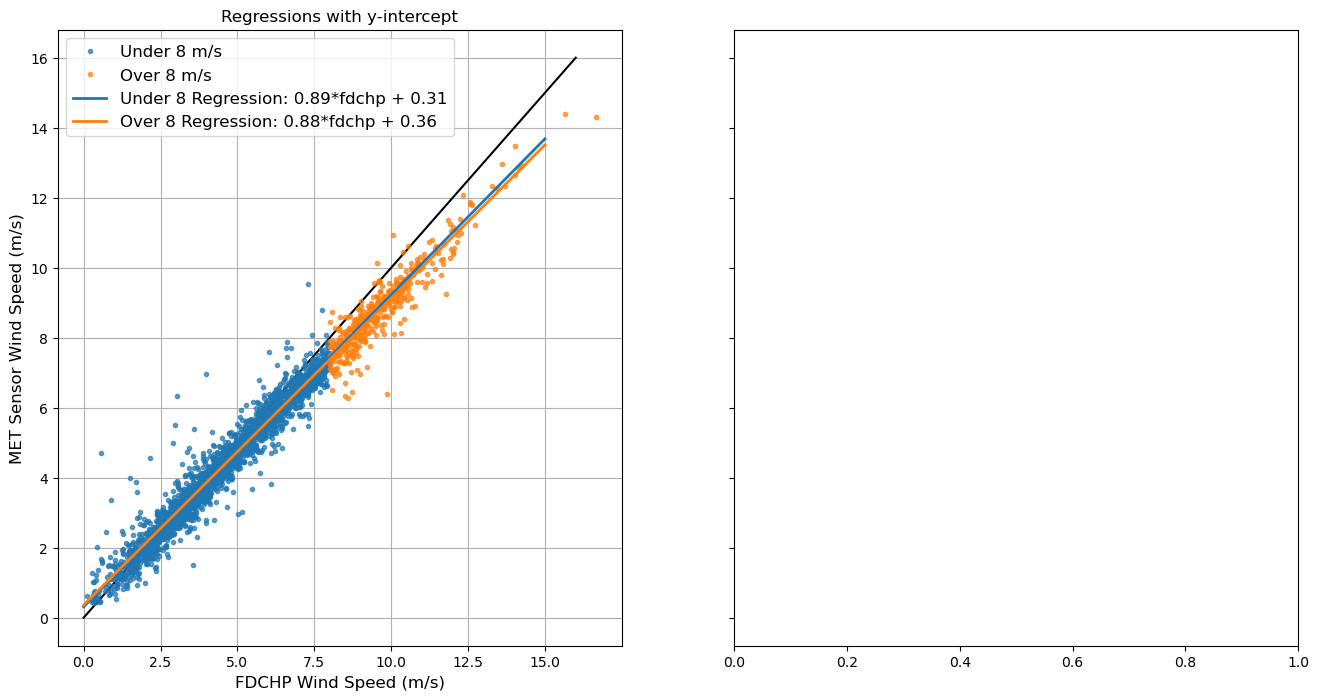

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)


ax1.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax1.plot(p20_fdchp_gill_data[:,0][gill_mask], p20_gill_data[gill_mask], marker=".", linestyle="", alpha=0.7, color="tab:blue", label='Under 8 m/s')
ax1.plot(p20_fdchp_gill_data[:,0][~gill_mask], p20_gill_data[~gill_mask], marker=".", linestyle="", alpha=0.7, color="tab:orange", label='Over 8 m/s')
#ax1.plot(p20_fdchp_1hr_avg['wind_speed'][met2_index], p20_met2_1hr_avg['wind_speed'][met2_index], marker=".", linestyle="", alpha=0.7, color="tab:orange", label='RM Young')
ax1.plot(x, p20_y_gill_sub8, color="tab:blue", linewidth=2, label=f'Under 8 Regression: {np.round(p20_gill_reg_sub8[0][0],2)}*fdchp + {np.round(p20_gill_reg_sub8[0][1], 2)}')
ax1.plot(x, p20_y_gill_over8, color="tab:orange", linewidth=2, label=f'Over 8 Regression: {np.round(p20_gill_reg_over8[0][0],2)}*fdchp + {np.round(p20_gill_reg_over8[0][1], 2)}')
#ax.plot(x, gill_slope*x, color = "tab:blue", label=f'Gill regression w/slope {np.round(gill_slope, 2)}')
ax1.set_ylabel('MET Sensor Wind Speed (m/s)', fontsize=12)
ax1.set_xlabel('FDCHP Wind Speed (m/s)', fontsize=12)
ax1.set_title('Regressions with y-intercept', fontsize=12)
ax1.grid()
ax1.legend(fontsize=12)

In [78]:
p20_gill_reg_over8

(array([0.87633432, 0.36359537]),
 array([84.89638845]),
 2,
 array([208.50747047,   2.81804586]))

Pioneer Ship Regressions

In [79]:
# Subselect only the relevant time period
p20_met1_1min = p20_met1.loc[slice(t1,t2)]
p20_met1_1min = resample_interpolate(p20_met1_1min)

p20_met2_1min = p20_met2.loc[slice(t1,t2)]
p20_met2_1min = resample_interpolate(p20_met2_1min)

# Underway data
p20_underway_1min = p20_underway.sel(time=slice(t1, t2))
p20_underway_1min = p20_underway_1min[['adj_wind_speed_port','adj_wind_speed_starboard']].to_dataframe()
p20_underway_1min = resample_interpolate(p20_underway_1min)
p20_underway_1min.index = p20_underway_1min.index.tz_localize('UTC')

# Find intersection of indicies
met1_index = [x for x in p20_met1_1min.index if x in p20_underway_1min.index]
met2_index = [x for x in p20_met2_1min.index if x in p20_underway_1min.index]

Text(0, 0.5, 'Wind Speed (m/s)')

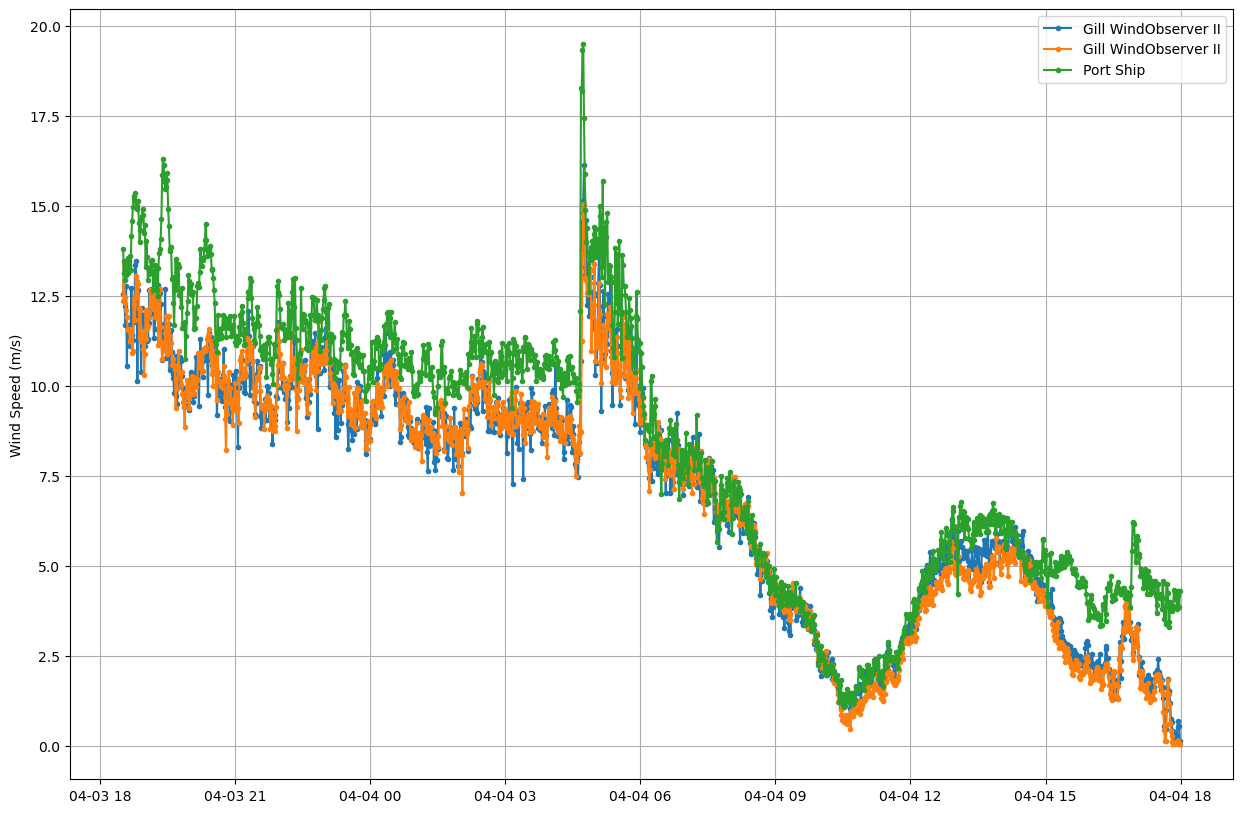

In [80]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(p20_met1_1min.loc[met1_index].index, p20_met1_1min.loc[met1_index]["wind_speed"], marker=".", label="Gill WindObserver II")
ax.plot(p20_met2_1min.loc[met2_index].index, p20_met2_1min.loc[met2_index]["wind_speed"], marker=".", label="Gill WindObserver II")
ax.plot(p20_underway_1min.loc[met1_index].index, p20_underway_1min.loc[met1_index]["adj_wind_speed_port"], marker=".", label="Port Ship")
ax.grid()
ax.legend()
ax.set_ylabel('Wind Speed (m/s)')

Text(0, 0.5, 'Ship heading')

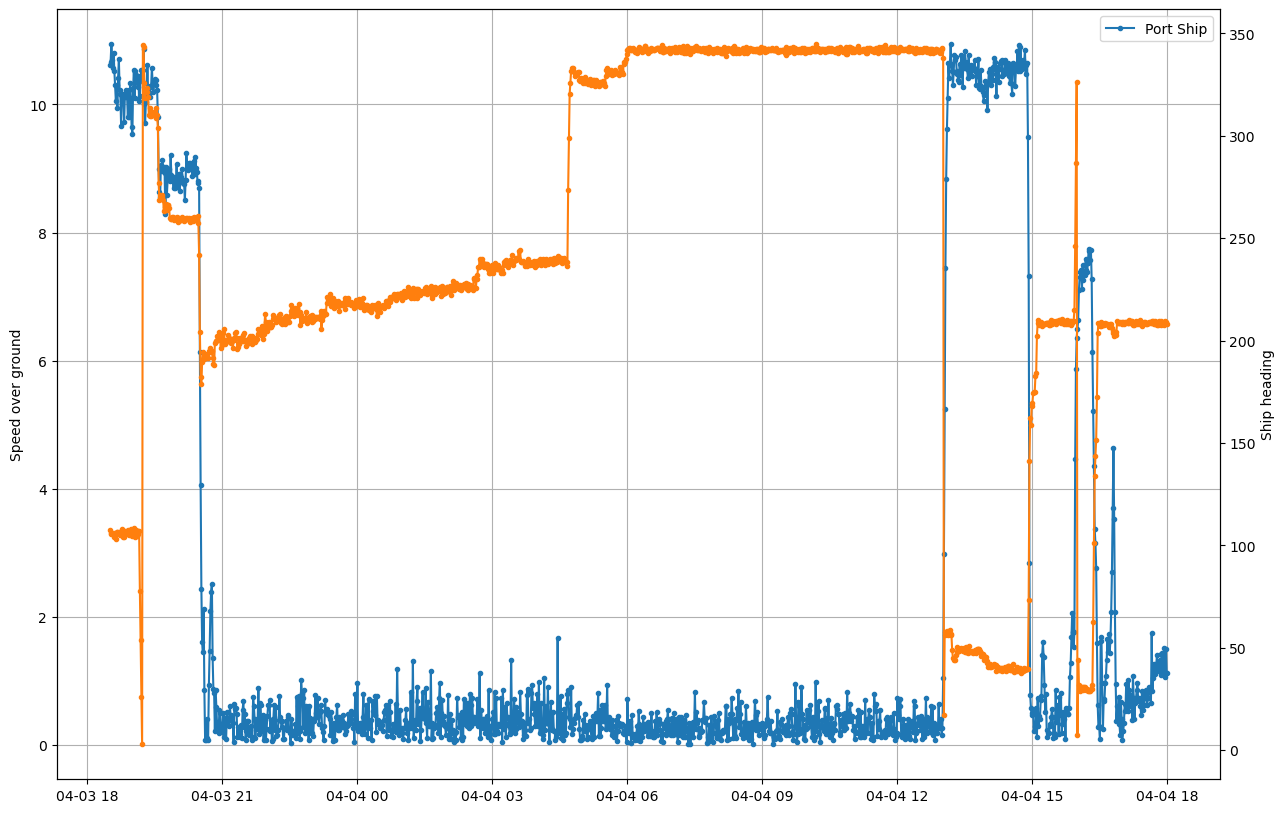

In [81]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(p20_underway.sel(time=slice(t1,t2))["time"], p20_underway.sel(time=slice(t1,t2))["speed_over_ground"], marker=".", label="Port Ship")
#ax.plot(p20_underway_1min.loc[met1_index].index, p20_underway_1min.loc[met1_index]["heading"], marker=".", label="Port Ship")
ax2 = ax.twinx()
ax2.plot(p20_underway.sel(time=slice(t1,t2))["time"], p20_underway.sel(time=slice(t1,t2))["heading"], marker=".", color="tab:orange")
ax.grid()
ax.legend()
ax.set_ylabel('Speed over ground')
ax2.set_ylabel('Ship heading')

In [82]:
p20_underway

<xarray.Dataset>
Dimensions:                            (time: 17364)
Coordinates:
  * time                               (time) datetime64[ns] 2024-03-29T14:50...
Data variables: (12/40)
    latitude                           (time) float64 41.52 41.52 ... 41.49
    longitude                          (time) float64 -70.67 -70.67 ... -70.67
    ship_speed                         (time) float64 0.03 0.08 ... 2.66 5.05
    heading                            (time) float64 24.7 24.65 ... 356.9 348.4
    DPS_COG                            (time) float64 144.3 269.3 ... 23.33 7.16
    speed_over_ground                  (time) float64 0.03 0.01 ... 3.58 5.91
    ...                                 ...
    em122                              (time) float64 nan nan nan ... nan nan
    EM710                              (time) float64 nan nan nan ... nan nan
    friction_velocity_starboard        (time) float64 0.3622 0.353 ... 0.2783
    adj_wind_speed_starboard           (time) float64 9.423 9.25 ... 6.894 7.773
    friction_velocity_port             (time) float64 nan nan ... 0.2414 0.2953
    adj_wind_speed_port                (time) float64 nan nan ... 6.982 8.122

In [83]:
p20_underway_1min

adj_wind_speed_port  adj_wind_speed_starboard
time                                                                    
2024-04-03 18:30:00+00:00                  NaN                       NaN
2024-04-03 18:31:00+00:00            13.794703                 13.929315
2024-04-03 18:32:00+00:00            13.115960                 13.365716
2024-04-03 18:33:00+00:00            13.445735                 13.379233
2024-04-03 18:34:00+00:00            12.946722                 12.980910
...                                        ...                       ...
2024-04-04 17:55:00+00:00             3.787337                  4.278361
2024-04-04 17:56:00+00:00             4.296797                  4.187315
2024-04-04 17:57:00+00:00             4.185937                  4.151545
2024-04-04 17:58:00+00:00             3.860288                  4.259907
2024-04-04 17:59:00+00:00             4.296797                  4.096185

[1410 rows x 2 columns]

In [84]:
p20_underway

<xarray.Dataset>
Dimensions:                            (time: 17364)
Coordinates:
  * time                               (time) datetime64[ns] 2024-03-29T14:50...
Data variables: (12/40)
    latitude                           (time) float64 41.52 41.52 ... 41.49
    longitude                          (time) float64 -70.67 -70.67 ... -70.67
    ship_speed                         (time) float64 0.03 0.08 ... 2.66 5.05
    heading                            (time) float64 24.7 24.65 ... 356.9 348.4
    DPS_COG                            (time) float64 144.3 269.3 ... 23.33 7.16
    speed_over_ground                  (time) float64 0.03 0.01 ... 3.58 5.91
    ...                                 ...
    em122                              (time) float64 nan nan nan ... nan nan
    EM710                              (time) float64 nan nan nan ... nan nan
    friction_velocity_starboard        (time) float64 0.3622 0.353 ... 0.2783
    adj_wind_speed_starboard           (time) float64 9.423 9.25 ... 6.894 7.773
    friction_velocity_port             (time) float64 nan nan ... 0.2414 0.2953
    adj_wind_speed_port                (time) float64 nan nan ... 6.982 8.122

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]), [])

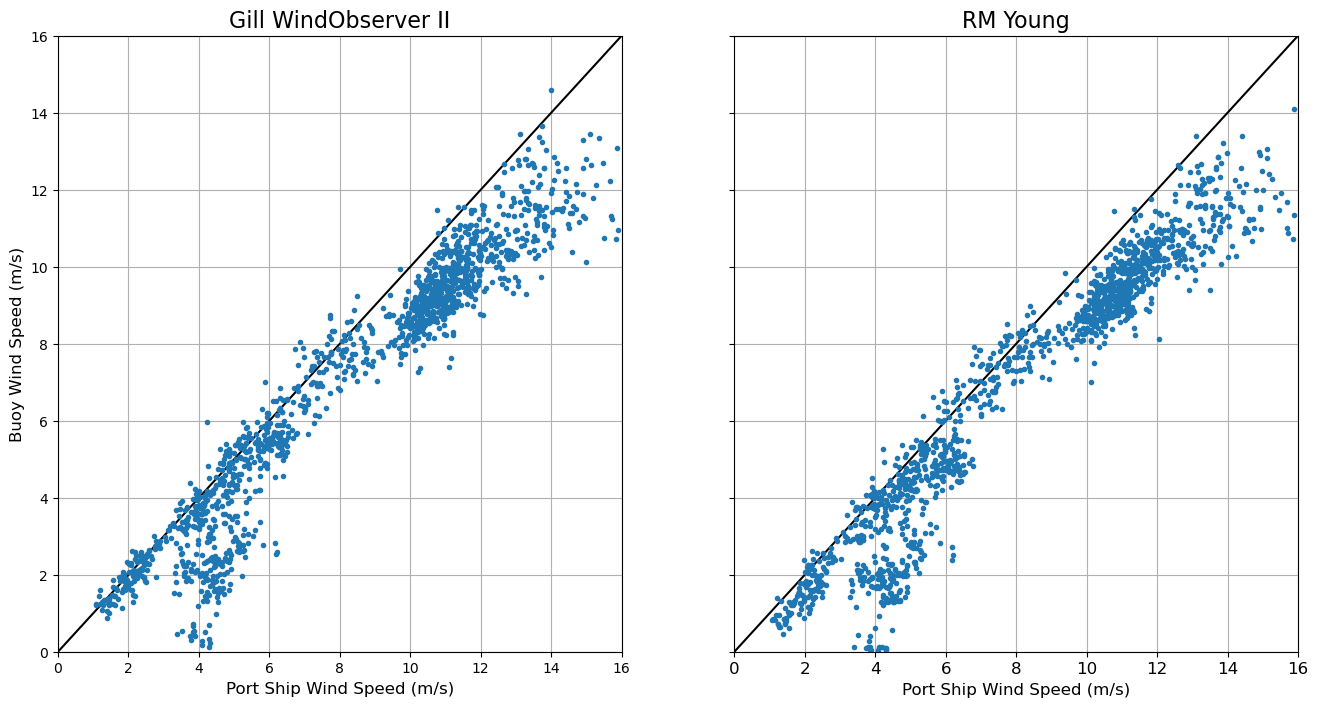

In [85]:
# Plot the comparisons!
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)

ax1.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax1.plot(p20_underway_1min.loc[met1_index]['adj_wind_speed_port'], p20_met1_1min.loc[met1_index]['wind_speed'], marker=".", linestyle="", label='Gill WindObserver II')
ax1.set_ylabel('Buoy Wind Speed (m/s)', fontsize=12)
ax1.set_ylim((0, 16))
ax1.set_xlim((0, 16))
ax1.set_xlabel('Port Ship Wind Speed (m/s)', fontsize=12)
ax1.set_title('Gill WindObserver II', fontsize=16)
ax1.grid()

ax2.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax2.plot(p20_underway_1min.loc[met2_index]['adj_wind_speed_port'], p20_met2_1min.loc[met2_index]['wind_speed'], marker=".", linestyle="", label='Gill WindObserver II')
ax2.set_xlabel('Port Ship Wind Speed (m/s)', fontsize=12)
ax2.set_title('RM Young', fontsize=16)
ax2.set_ylim((0, 16))
ax2.set_xlim((0, 16))
ax2.grid()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [86]:
fig.savefig('../Pioneer20_gill_young_vs_ship.png')

## Compass-Wind Analysis
Need to seperate out the times that the Irminger RM Young anemometer is functioning vs when it isn't and plot the results

In [87]:
irminger11_met2.columns

Index(['latitude (degrees_north)', 'longitude (degrees_east)', 'crs',
       'feature_type_instance', 'platform',
       'air_temperature (degrees_Celsius)', 'barometric_pressure (mbar)',
       'eastward_wind_velocity (m s-1)', 'longwave_irradiance (W m-2)',
       'northward_wind_velocity (m s-1)', 'precipitation_level (mm)',
       'relative_humidity (percent)', 'sea_surface_conductivity (S m-1)',
       'sea_surface_temperature (degrees_Celsius)',
       'shortwave_irradiance (W m-2)', 'psu (PSU)', 'rho (kg m-3)',
       'wind_speed', 'wind_direction'],
      dtype='object')

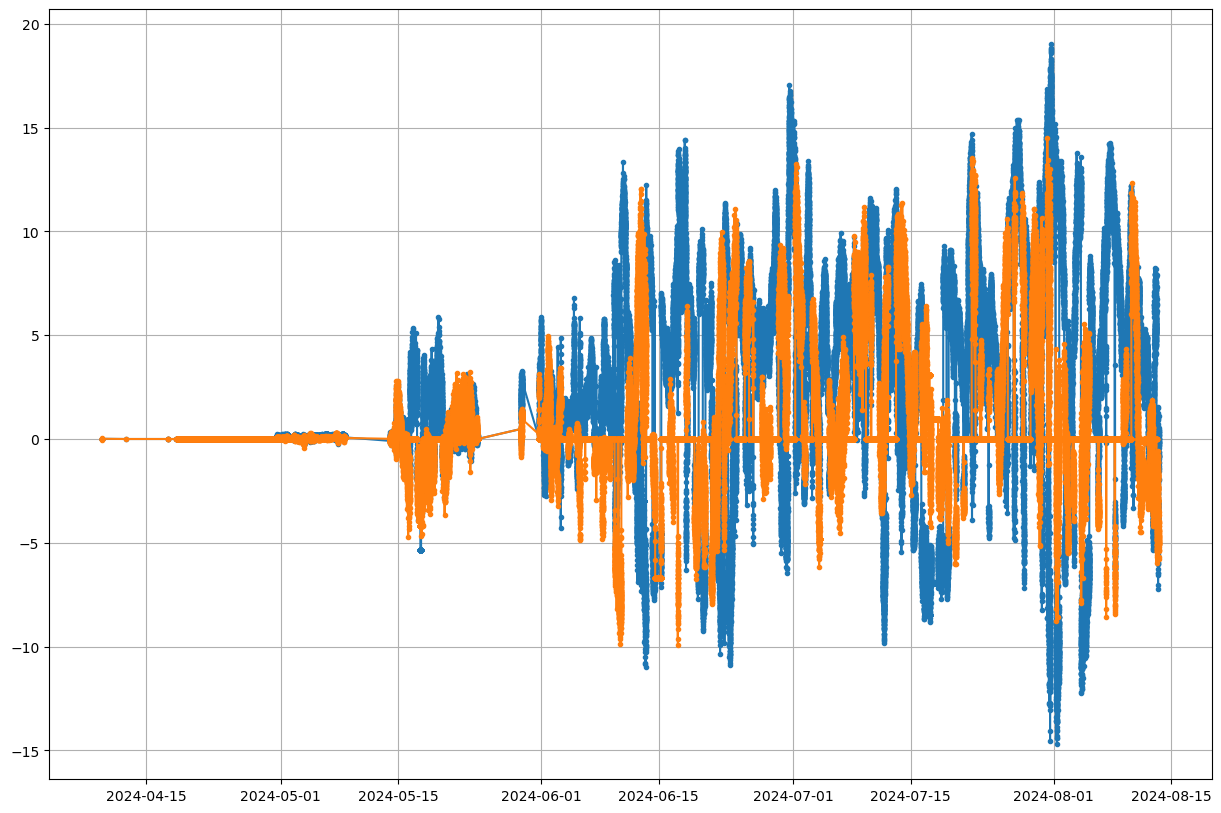

In [88]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(irminger11_met2.index, irminger11_met2["northward_wind_velocity (m s-1)"], marker=".", color="tab:blue")
ax.plot(irminger11_met2.index, irminger11_met2["eastward_wind_velocity (m s-1)"], marker=".", color="tab:orange")
ax.grid()

In [106]:
mask, = np.where(irminger11_met2["eastward_wind_velocity (m s-1)"] == 0)
nomask, = np.where(irminger11_met2["eastward_wind_velocity (m s-1)"] != 0)
mask

array([     0,      1,      4, ..., 149131, 149132, 149133], dtype=int64)

In [107]:
mask2, = np.where(irminger11_met2["northward_wind_velocity (m s-1)"] == 0)
nomask2, = np.where(irminger11_met2["northward_wind_velocity (m s-1)"] != 0)
mask2

array([     0,      4,      8, ..., 147932, 147933, 148284], dtype=int64)

C:\Users\areed\AppData\Local\Temp\ipykernel_2624\1060390692.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(irminger11_met2.index[mask], irminger11_met2["eastward_wind_velocity (m s-1)"][mask], marker=".", color="tab:orange")


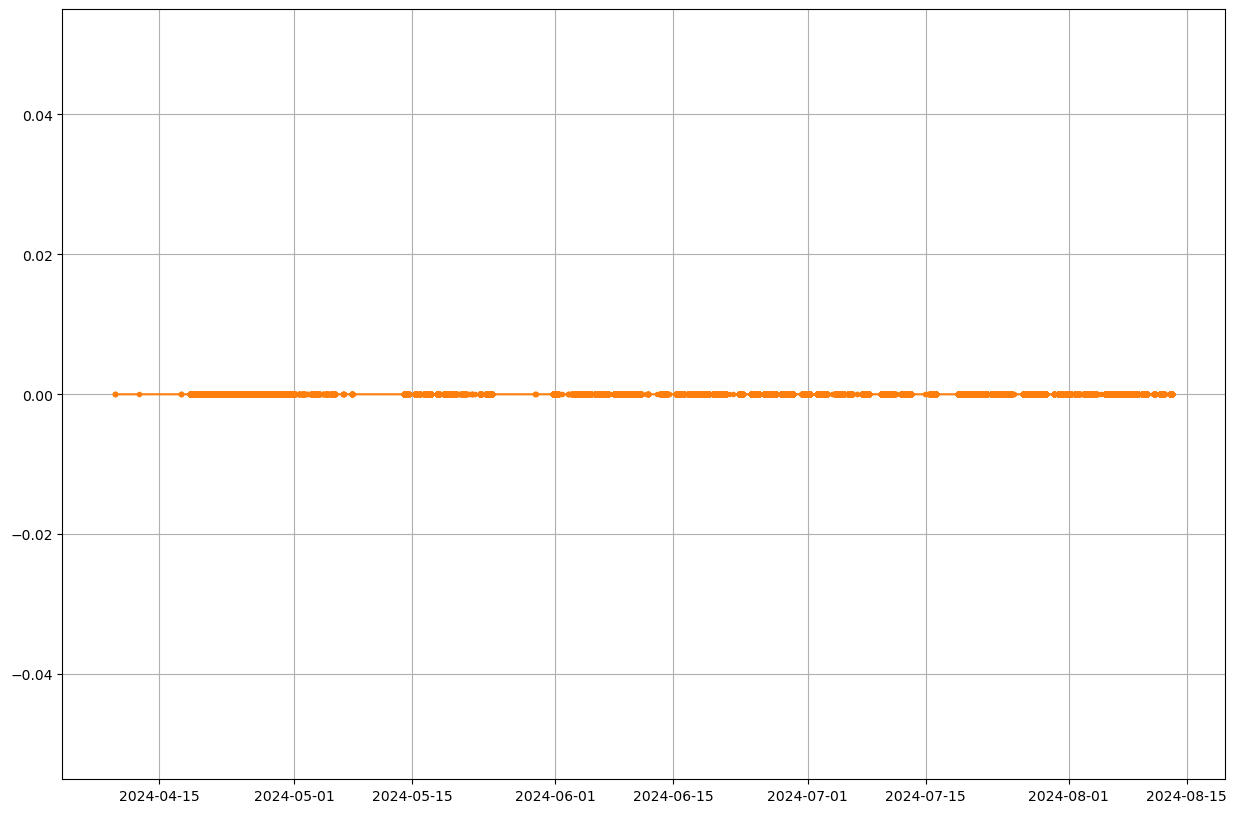

In [92]:
fig, ax = plt.subplots(figsize=(15,10))

#ax.plot(irminger11_met2.index[mask2], irminger11_met2["northward_wind_velocity (m s-1)"][mask2], marker=".", color="tab:blue")
ax.plot(irminger11_met2.index[mask], irminger11_met2["eastward_wind_velocity (m s-1)"][mask], marker=".", color="tab:orange")
ax.grid()

In [96]:
len(mask2)

Index(['latitude (degrees_north)', 'longitude (degrees_east)', 'crs',
       'feature_type_instance', 'platform',
       'air_temperature (degrees_Celsius)', 'barometric_pressure (mbar)',
       'eastward_wind_velocity (m s-1)', 'longwave_irradiance (W m-2)',
       'northward_wind_velocity (m s-1)', 'precipitation_level (mm)',
       'relative_humidity (percent)', 'sea_surface_conductivity (S m-1)',
       'sea_surface_temperature (degrees_Celsius)',
       'shortwave_irradiance (W m-2)', 'psu (PSU)', 'rho (kg m-3)',
       'wind_speed', 'wind_direction'],
      dtype='object')

In [108]:
flatline = list(set(mask).union(mask2))
noflat = list(set(nomask).intersection(nomask2))
flatline

[0,
 1,
 4,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 1

In [114]:
noflat = sorted(noflat)

C:\Users\areed\AppData\Local\Temp\ipykernel_2624\2009894667.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(irminger11_met2.index[noflat], irminger11_met2["wind_speed"][noflat], marker=".", color="tab:orange")


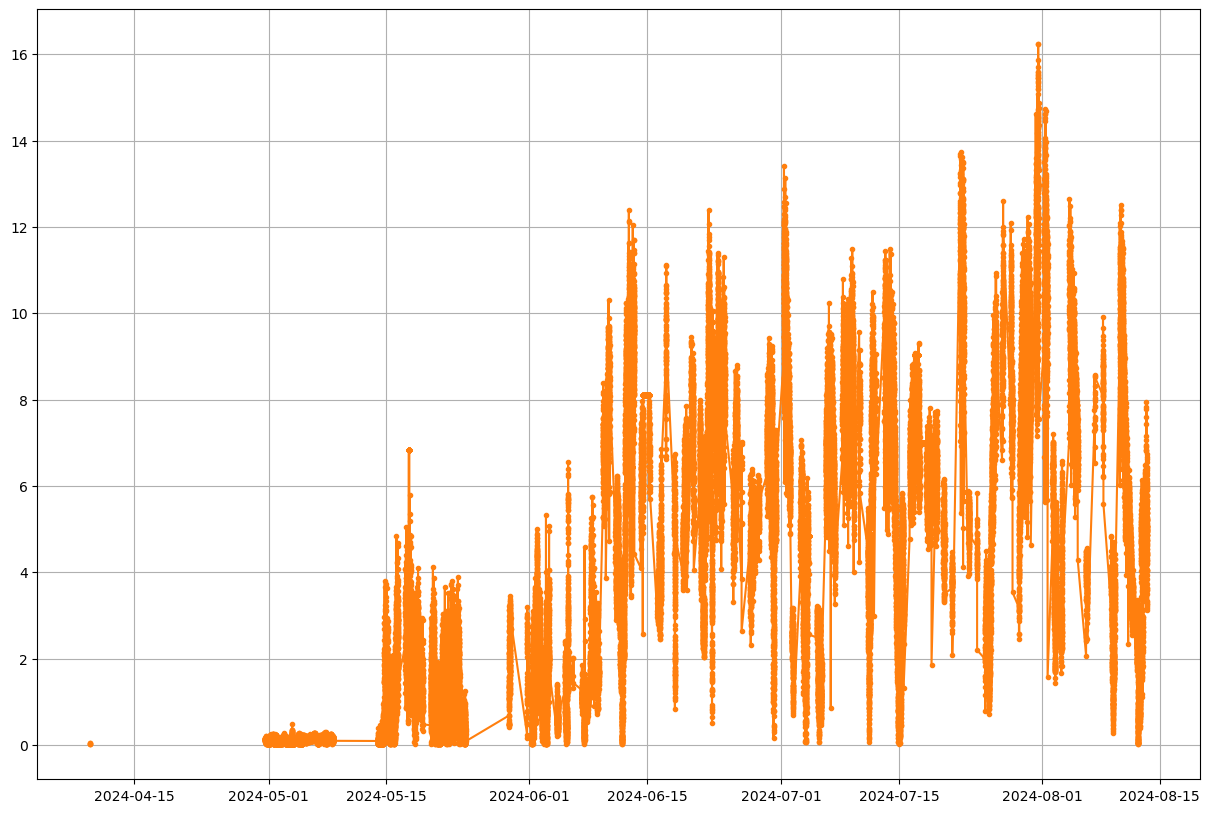

In [115]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(irminger11_met2.index[noflat], irminger11_met2["wind_speed"][noflat], marker=".", color="tab:orange")
ax.grid()

In [116]:
irminger11_flatline = irminger11_met2.iloc[flatline]
irminger11_working = irminger11_met2.iloc[noflat]
irminger11_flatline

latitude (degrees_north)  longitude (degrees_east)  \
time (UTC)                                                                      
2024-04-09 17:57:56+00:00                    59.998                   -39.481   
2024-04-09 18:21:13+00:00                    59.998                   -39.481   
2024-04-09 18:24:27+00:00                    59.998                   -39.481   
2024-04-12 13:43:49+00:00                    59.998                   -39.481   
2024-04-17 14:04:28+00:00                    59.998                   -39.481   
...                                             ...                       ...   
2024-08-13 05:55:57+00:00                    59.998                   -39.481   
2024-08-13 05:56:30+00:00                    59.998                   -39.481   
2024-08-13 05:57:34+00:00                    59.998                   -39.481   
2024-08-13 05:58:39+00:00                    59.998                   -39.481   
2024-08-13 05:59:45+00:00                    59.998                   -39.481   

                                  crs  feature_type_instance    platform  \
time (UTC)                                                                 
2024-04-09 17:57:56+00:00 -2147483647                    NaN -2147483647   
2024-04-09 18:21:13+00:00 -2147483647                    NaN -2147483647   
2024-04-09 18:24:27+00:00 -2147483647                    NaN -2147483647   
2024-04-12 13:43:49+00:00 -2147483647                    NaN -2147483647   
2024-04-17 14:04:28+00:00 -2147483647                    NaN -2147483647   
...                               ...                    ...         ...   
2024-08-13 05:55:57+00:00 -2147483647                    NaN -2147483647   
2024-08-13 05:56:30+00:00 -2147483647                    NaN -2147483647   
2024-08-13 05:57:34+00:00 -2147483647                    NaN -2147483647   
2024-08-13 05:58:39+00:00 -2147483647                    NaN -2147483647   
2024-08-13 05:59:45+00:00 -2147483647                    NaN -2147483647   

                           air_temperature (degrees_Celsius)  \
time (UTC)                                                     
2024-04-09 17:57:56+00:00                            -20.000   
2024-04-09 18:21:13+00:00                             60.440   
2024-04-09 18:24:27+00:00                             60.493   
2024-04-12 13:43:49+00:00                            -20.000   
2024-04-17 14:04:28+00:00                            -20.000   
...                                                      ...   
2024-08-13 05:55:57+00:00                              8.553   
2024-08-13 05:56:30+00:00                              8.568   
2024-08-13 05:57:34+00:00                              8.598   
2024-08-13 05:58:39+00:00                              8.629   
2024-08-13 05:59:45+00:00                              8.636   

                           barometric_pressure (mbar)  \
time (UTC)                                              
2024-04-09 17:57:56+00:00                      900.00   
2024-04-09 18:21:13+00:00                     1015.29   
2024-04-09 18:24:27+00:00                     1015.29   
2024-04-12 13:43:49+00:00                      900.00   
2024-04-17 14:04:28+00:00                      900.00   
...                                               ...   
2024-08-13 05:55:57+00:00                      992.60   
2024-08-13 05:56:30+00:00                      992.47   
2024-08-13 05:57:34+00:00                      992.40   
2024-08-13 05:58:39+00:00                      992.26   
2024-08-13 05:59:45+00:00                      992.26   

                           eastward_wind_velocity (m s-1)  \
time (UTC)                                                  
2024-04-09 17:57:56+00:00                             0.0   
2024-04-09 18:21:13+00:00                             0.0   
2024-04-09 18:24:27+00:00                             0.0   
2024-04-12 13:43:49+00:00                             0.0   
2024-04-17 14:04:28+00:00                  

In [117]:
bad_compass = irminger11_flatline.resample('1H').mean()
good_compass = irminger11_working.resample('1H').mean()

C:\Users\areed\AppData\Local\Temp\ipykernel_2624\256375237.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bad_compass = irminger11_flatline.resample('1H').mean()
C:\Users\areed\AppData\Local\Temp\ipykernel_2624\256375237.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  good_compass = irminger11_working.resample('1H').mean()


In [123]:
bad_compass = bad_compass.merge(irminger11_fdchp_1hr_avg['wind_speed'], left_index=True, right_index=True, how='left')
good_compass = good_compass.merge(irminger11_fdchp_1hr_avg['wind_speed'], left_index=True, right_index=True, how='left')

In [125]:
bad_compass

latitude (degrees_north)  longitude (degrees_east)  \
time (UTC)                                                                      
2024-04-09 17:00:00+00:00                    59.998                   -39.481   
2024-04-09 18:00:00+00:00                    59.998                   -39.481   
2024-04-09 19:00:00+00:00                       NaN                       NaN   
2024-04-09 20:00:00+00:00                       NaN                       NaN   
2024-04-09 21:00:00+00:00                       NaN                       NaN   
...                                             ...                       ...   
2024-08-13 01:00:00+00:00                    59.998                   -39.481   
2024-08-13 02:00:00+00:00                    59.998                   -39.481   
2024-08-13 03:00:00+00:00                    59.998                   -39.481   
2024-08-13 04:00:00+00:00                    59.998                   -39.481   
2024-08-13 05:00:00+00:00                    59.998                   -39.481   

                                    crs  feature_type_instance      platform  \
time (UTC)                                                                     
2024-04-09 17:00:00+00:00 -2.147484e+09                    NaN -2.147484e+09   
2024-04-09 18:00:00+00:00 -2.147484e+09                    NaN -2.147484e+09   
2024-04-09 19:00:00+00:00           NaN                    NaN           NaN   
2024-04-09 20:00:00+00:00           NaN                    NaN           NaN   
2024-04-09 21:00:00+00:00           NaN                    NaN           NaN   
...                                 ...                    ...           ...   
2024-08-13 01:00:00+00:00 -2.147484e+09                    NaN -2.147484e+09   
2024-08-13 02:00:00+00:00 -2.147484e+09                    NaN -2.147484e+09   
2024-08-13 03:00:00+00:00 -2.147484e+09                    NaN -2.147484e+09   
2024-08-13 04:00:00+00:00 -2.147484e+09                    NaN -2.147484e+09   
2024-08-13 05:00:00+00:00 -2.147484e+09                    NaN -2.147484e+09   

                           air_temperature (degrees_Celsius)  \
time (UTC)                                                     
2024-04-09 17:00:00+00:00                         -20.000000   
2024-04-09 18:00:00+00:00                          60.466500   
2024-04-09 19:00:00+00:00                                NaN   
2024-04-09 20:00:00+00:00                                NaN   
2024-04-09 21:00:00+00:00                                NaN   
...                                                      ...   
2024-08-13 01:00:00+00:00                           8.245267   
2024-08-13 02:00:00+00:00                           8.487583   
2024-08-13 03:00:00+00:00                           8.598700   
2024-08-13 04:00:00+00:00                           8.302083   
2024-08-13 05:00:00+00:00                           8.356983   

                           barometric_pressure (mbar)  \
time (UTC)                                              
2024-04-09 17:00:00+00:00                  900.000000   
2024-04-09 18:00:00+00:00                 1015.290000   
2024-04-09 19:00:00+00:00                         NaN   
2024-04-09 20:00:00+00:00                         NaN   
2024-04-09 21:00:00+00:00                         NaN   
...                                               ...   
2024-08-13 01:00:00+00:00                  993.024667   
2024-08-13 02:00:00+00:00                  992.959167   
2024-08-13 03:00:00+00:00                  992.829167   
2024-08-13 04:00:00+00:00                  992.580167   
2024-08-13 05:00:00+00:00                  992.422167   

                           eastward_wind_velocity (m s-1)  \
time (UTC)                                                  
2024-04-09 17:00:00+00:00                             0.0   
2024-04-09 18:00:00+00:00                             0.0   
2024-04-09 19:00:00+00:00                             NaN   
2024-04-09 20:00:00+00:00                           

In [127]:
bad_mask = bad_compass.index > "2024-06-10T00:00:00"
good_mask = good_compass.index > "2024-06-10T00:00:00"

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]), [])

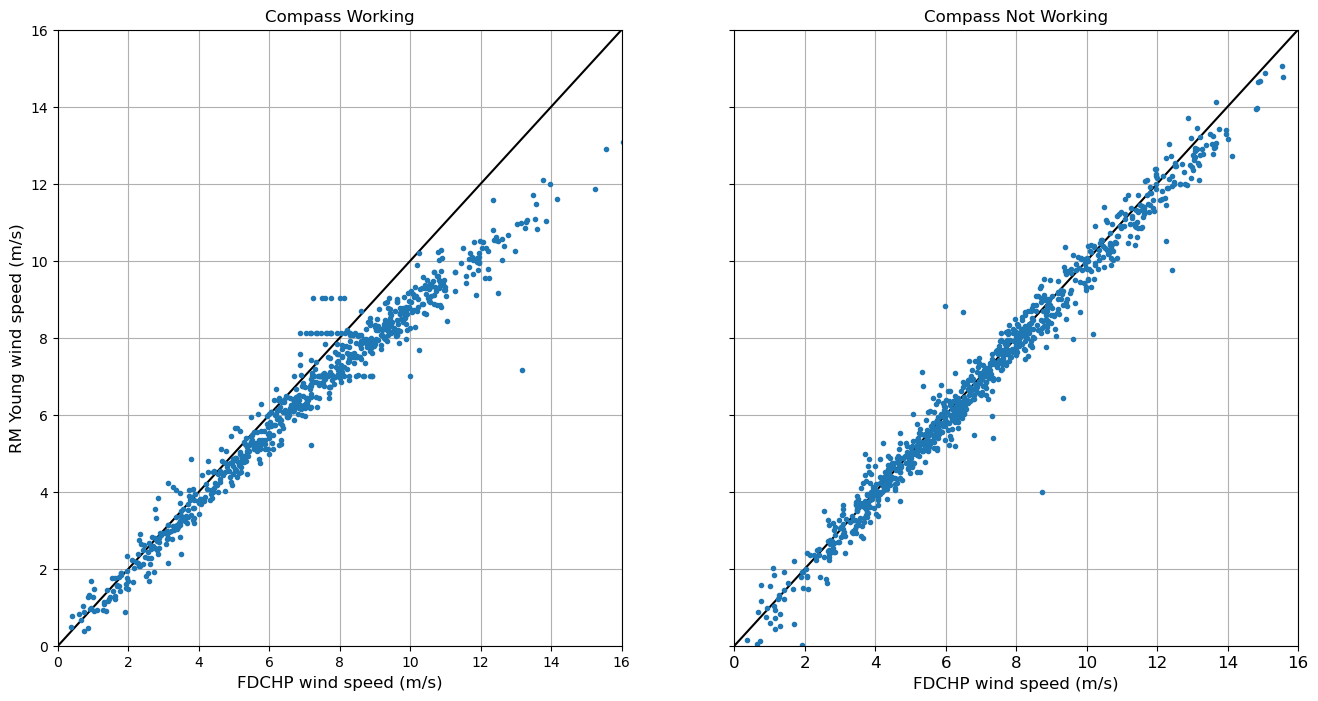

In [130]:
# Plot the comparisons!
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)

ax1.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax1.plot(good_compass['wind_speed_y'][good_mask], good_compass['wind_speed_x'][good_mask], marker=".", linestyle="")
ax1.set_ylabel('RM Young wind speed (m/s)', fontsize=12)
ax1.set_ylim((0, 16))
ax1.set_xlim((0, 16))
ax1.set_xlabel('FDCHP wind speed (m/s)', fontsize=12)
ax1.set_title('Compass Working')
ax1.grid()

ax2.plot(np.arange(0, 17, 1), np.arange(0, 17, 1), color="black")
ax2.plot(bad_compass['wind_speed_y'][bad_mask], bad_compass['wind_speed_x'][bad_mask], marker=".", linestyle="")
#ax2.set_ylabel('RM Young wind speed (m/s)', fontsize=12)
ax2.set_ylim((0, 16))
ax2.set_xlim((0, 16))
ax2.set_xlabel('FDCHP wind speed (m/s)', fontsize=12)
ax2.set_title('Compass Not Working')
ax2.grid()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [131]:
fig.savefig("../Irminger11_rm_young_compass_comparison.png", facecolor="white", transparent=False, edgecolor="black", bbox_inches="tight")

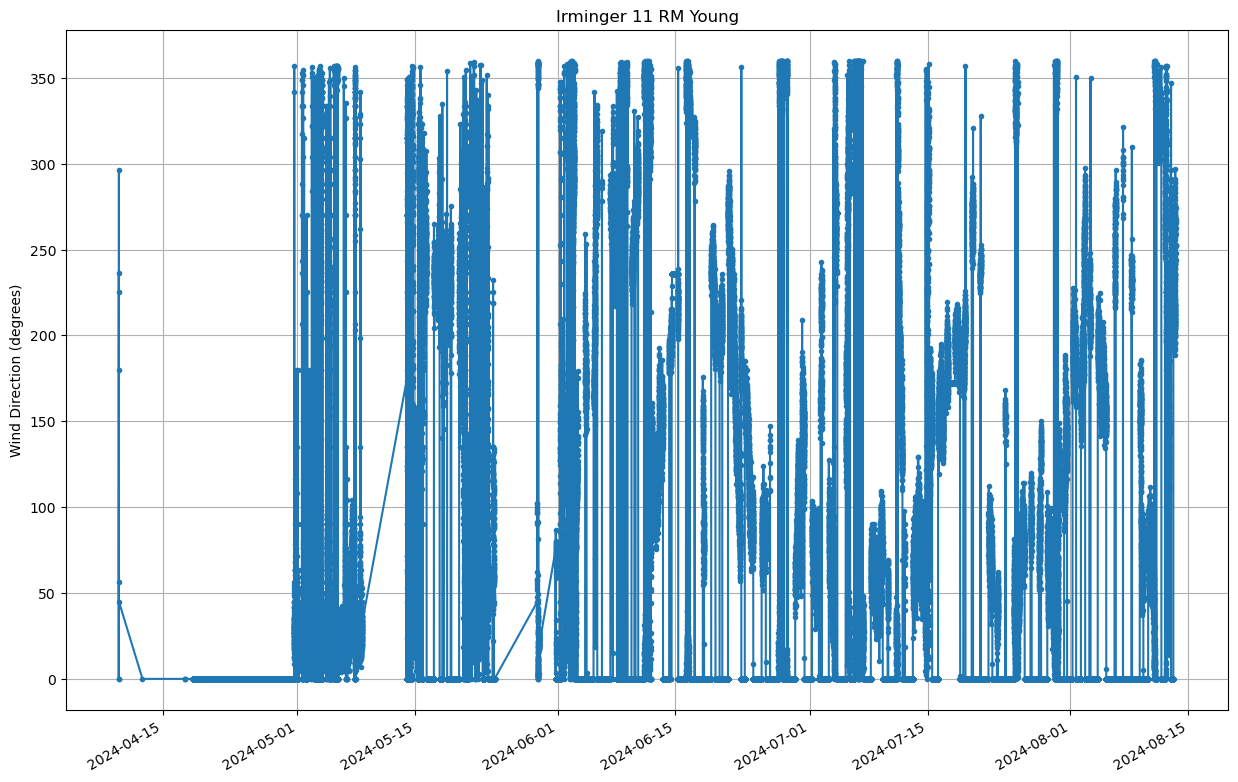

In [135]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(irminger11_met2.index, irminger11_met2["wind_direction"], marker=".", color="tab:blue")
ax.set_ylabel('Wind Direction (degrees)')
ax.set_title('Irminger 11 RM Young')
ax.grid()
fig.autofmt_xdate()

In [136]:
fig.savefig("../Irminger11_rm_young_compass.png", facecolor="white", transparent=False, edgecolor="black", bbox_inches="tight")